# <a id='toc1_'></a>[Spaceship Titanic](#toc0_)

## <a id='toc1_1_'></a>[Description](#toc0_)

In this competition task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## <a id='toc1_2_'></a>[File and Data Field Descriptions](#toc0_)
**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.


* `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
* `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* `Destination` - The planet the passenger will be debarking to.
* `Age` - The age of the passenger.
* `VIP` - Whether the passenger has paid for special VIP service during the voyage.
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* `Name` - The first and last names of the passenger.
* `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

**Table of contents**<a id='toc0_'></a>    
- [Spaceship Titanic](#toc1_)    
  - [Description](#toc1_1_)    
  - [File and Data Field Descriptions](#toc1_2_)    
  - [Goal](#toc1_3_)    
  - [Objectives](#toc1_4_)    
  - [EDA and Data Review](#toc1_5_)    
    - [Initial Data Review](#toc1_5_1_)    
      - [Missing values](#toc1_5_1_1_)    
      - [Review Duplicates](#toc1_5_1_2_)    
      - [Review object columns](#toc1_5_1_3_)    
      - [Review numerical features](#toc1_5_1_4_)    
      - [Identify outliers](#toc1_5_1_5_)    
      - [Bin the numerical features](#toc1_5_1_6_)    
  - [Exploratory Data Analysis](#toc1_6_)    
    - [Analyse, how different passenger parameters are associated with transportation to another dimension.](#toc1_6_1_)    
      - [Categorical Feature Association with Transportation to Another Dimension](#toc1_6_1_1_)    
      - [Numerical Feature Association with Transportation to Another Dimension](#toc1_6_1_2_)    
    - [Analyse how different passenger parameters are associated with each other](#toc1_6_2_)    
      - [Age association with other categorical features in the dataset](#toc1_6_2_1_)    
      - [Cabin number association with passenger features](#toc1_6_2_2_)    
      - [CabinDeck association with passenger parameters](#toc1_6_2_3_)    
      - [CabinSide association with passenger parameters](#toc1_6_2_4_)    
      - [HomePlanet association with other categorical features](#toc1_6_2_5_)    
      - [CryoSleep association with passenger features](#toc1_6_2_6_)    
      - [Destination association with passenger features](#toc1_6_2_7_)    
      - [VIP Association with passengers parameters](#toc1_6_2_8_)    
      - [RoomService association with passenger features](#toc1_6_2_9_)    
      - [FoodCourt, ShoppingMall, Spa, VRDeck imputation](#toc1_6_2_10_)    
    - [Analyse, how different passenger parameters are correlated.](#toc1_6_3_)    
      - [Numeric feature correlations](#toc1_6_3_1_)    
      - [Categorical feature associations](#toc1_6_3_2_)    
    - [Identify groups of similar passengers.](#toc1_6_4_)    
      - [DBSCAN Clustering](#toc1_6_4_1_)    
  - [Summary](#toc1_7_)    
  - [Data Preprocessing Conclusions](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_3_'></a>[Goal](#toc0_)

* Make a model that predicts, whether a passenger was transported to an alternate dimension and to find the features that are the most important for this prediction

## <a id='toc1_4_'></a>[Objectives](#toc0_)

**Data Aquisition and Understanding**
* Analyse, how different passenger parameters are associated with transportation to another dimension.
* Analyse, how different passenger parameters are associated with each other.
* Analyse, how different passenger parameters are correlated.
* Identify groups of similar passengers.


In [1]:
import sys
import os

project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
utils_dir = os.path.join(project_dir, 'utils')
sys.path.append(utils_dir)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

import functions as fu
import plotters as pl
import transformers

import warnings
from typing import List
import missingno as msno

from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer

from itertools import combinations
from umap import UMAP

from sklearn.cluster import DBSCAN



In [3]:
warnings.filterwarnings('ignore')

plt.rcParams.update({
    'font.size': 10, 
    'font.family': 'sans-serif',
    'axes.labelsize': 10,             
    'axes.titlesize': 11,             
    'xtick.labelsize': 8,            
    'ytick.labelsize': 8,            
    'legend.fontsize': 8,            
    'lines.linewidth': 2,             
    'axes.grid': False, 
    })

pastel_blue_green_palette = (
    sns.color_palette(
        [
            "#a6c8e0", "#7fc98f", "#5fc8af", 
            "#9edbad", "#8fa9c7", "#7fbfbf",
            "#578dab", "#4a9a7e"
        ])
)
sequential_palette8 = sns.color_palette(
    [
        '#a7ceef', '#92bcd9', '#7daac3', 
        '#6999ad', '#548799', '#3f7583',
        '#2a5c6d', '#154e5a'
    ]
)

plt.style.use('seaborn-v0_8-muted')
sns.set_palette(pastel_blue_green_palette)

## <a id='toc1_5_'></a>[EDA and Data Review](#toc0_)

The main task of this part is to gain understanding about the features provided in the dataset, analise possible associations between features and generate ideas for feature engineering.

---

### <a id='toc1_5_1_'></a>[Initial Data Review](#toc0_)

In [4]:
train = pd.read_csv('../data/train.csv')

In [5]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

*Comments:*

* Since PassengerId and Cabin are combination of categorical information, they will be split up into pats: PassengerId will be split up into group number and passenger number, and Cabin will be split up into deck, cabin number and cabin side. Also. Since group number may not be usefull, passengers per group for each passenger will also be calculated. For passenger name it will be split into Name and Surname, also passengers with the same surname will be computed to calculate number of Family members.

In [6]:
# Split the `Cabin` into three subparameters - deck/num/side, where side can be
# either P for Port or S for Starboard.
column_to_split = 'Cabin'
columns_split_into = ['CabinDeck', 'CabinNum', 'CabinSide']

def split_by_symbol(df: pd.DataFrame, column_to_split: str, 
                   columns_split_into: List, symbol: str) -> pd.DataFrame:
    df = df.copy()
    df[columns_split_into] = df[column_to_split].str.split(symbol, expand=True)
    return df

train = split_by_symbol(train, column_to_split, columns_split_into, symbol='/')
train['CabinNum'] = train['CabinNum'].astype('float64')

In [7]:
# Split the PassengerId into group the passenger is travelling with and pp is 
# their number within the group
column_to_split = 'PassengerId'
columns_split_into = ['PassengerGroup', 'PassengerNumber']

train = split_by_symbol(train, column_to_split, columns_split_into, symbol='_')

In [8]:
# Calculate passengers per group
train['PassengersPerGroup'] = (
    train['PassengerGroup'].map(lambda x: train['PassengerGroup'].value_counts()[x])
)

In [9]:
# Split Name into Name and surname
column_to_split = 'Name'
columns_split_into = ['Name', 'Surname']

train = split_by_symbol(train, column_to_split, columns_split_into, symbol=' ')

In [10]:
train['Surname'].fillna('Unknown', inplace=True)

In [11]:
# Calculate FamilyMembers per surname

train['FamilyMembers'] = train.groupby('Surname')['Surname'].transform('count')

In [12]:
train['Surname'] = train['Surname'].replace({'Unknown': np.nan})
train['FamilyMembers'] = train['FamilyMembers'].where(train['FamilyMembers'] <= 50, np.nan)

---

#### <a id='toc1_5_1_1_'></a>[Missing values](#toc0_)

*Comment:* 
Some missing values can be found in multiple columns. Half of all features are categorical, such as CryoSleep, Destination, and others are numerical - FoodCourt, RoomService and others.   

In [13]:
train.isna().sum()

PassengerId             0
HomePlanet            201
CryoSleep             217
Cabin                 199
Destination           182
Age                   179
VIP                   203
RoomService           181
FoodCourt             183
ShoppingMall          208
Spa                   183
VRDeck                188
Name                  200
Transported             0
CabinDeck             199
CabinNum              199
CabinSide             199
PassengerGroup          0
PassengerNumber         0
PassengersPerGroup      0
Surname               200
FamilyMembers         200
dtype: int64

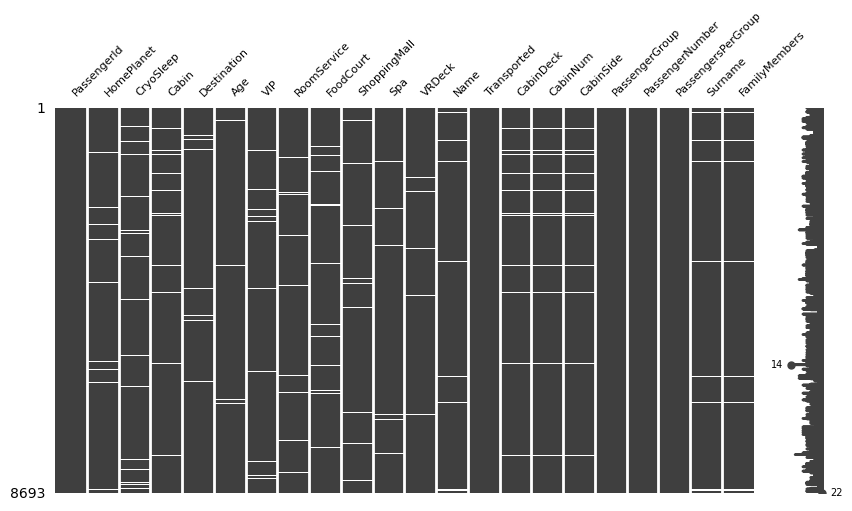

In [14]:
msno.matrix(train, figsize=(10, 5), fontsize=8);

*Comment:* 
Missing values are evenly distributed through the dataset and do not seem to show any particular pattern. As different columns may show different patterns for missing values, imputation of missing values will be addressed during the EDA process.

---

#### <a id='toc1_5_1_2_'></a>[Review Duplicates](#toc0_)

In [15]:
train.duplicated().sum()

0

*Comments:* 
No duplicated entries found in the dataset

---

#### <a id='toc1_5_1_3_'></a>[Review object columns](#toc0_)

In [16]:
fu.count_unique(train)

PassengerId unique entries: 8693
HomePlanet unique entries: 4
CryoSleep unique entries: 3
Cabin unique entries: 6561
Destination unique entries: 4
Age unique entries: 81
VIP unique entries: 3
RoomService unique entries: 1274
FoodCourt unique entries: 1508
ShoppingMall unique entries: 1116
Spa unique entries: 1328
VRDeck unique entries: 1307
Name unique entries: 2707
Transported unique entries: 2
CabinDeck unique entries: 9
CabinNum unique entries: 1818
CabinSide unique entries: 3
PassengerGroup unique entries: 6217
PassengerNumber unique entries: 8
PassengersPerGroup unique entries: 8
Surname unique entries: 2218
FamilyMembers unique entries: 18


*Comment:*
There are several columns with high number of unique values indicating either unique identifiers or very repettitive identifiers. Some of the object parameters show high number of unique entries - like `PassengerGroup` shows 6217 unique numbers indicating it may not be a good parameter for predicting. 

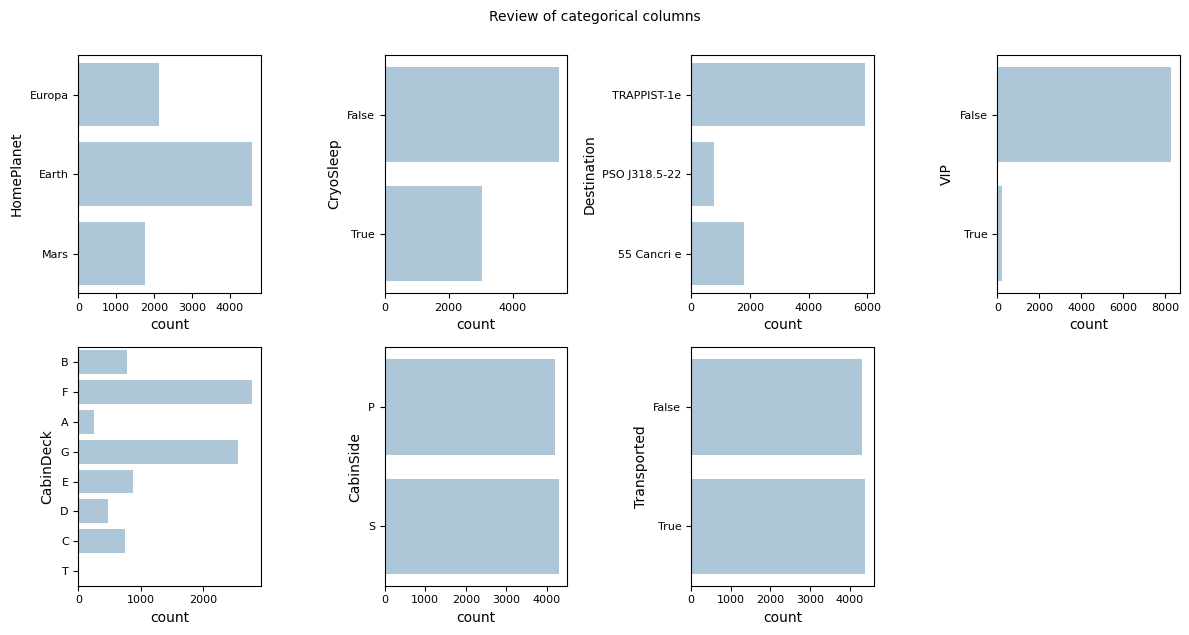

In [17]:
# Review categorical columns with few unique values
selected_cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                        'CabinDeck', 'CabinSide', 'Transported']

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for col, ax in zip(selected_cat_columns, axes):

    sns.countplot(data=train, y=col, ax=ax)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.suptitle('Review of categorical columns', size='medium', y=1.05);

*Comments:*
* `HomePlanet` is one of the three - Mars, Earth or Europa with Earth as the most common option.
* `CryoSleep` either True or False.
* `Destination` one of the three possible with TRAPPIST-1e beeing the most common.
* `VIP` - Either false or True. Only a small proportion is true.
* `Cabin_deck` - most passengers are located in the F and G deck of the spaceship.
* `Cabin_side` - passengers are equaly distributed in both sides of the ship.
* `Transported` - around half of all passengers have been transported to an alternate dimension.

---

#### <a id='toc1_5_1_4_'></a>[Review numerical features](#toc0_)

In [18]:
train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck     CabinNum  PassengersPerGroup  FamilyMembers  
count   8505.000000  8494.000000         8693.000000    8493.000000  
mean     304.854791   600.367671            2.035546       5.428117  
std     1145.717189   511.867226            1.596347       2.891901  
min        0.000000     0.000000            1.000000       1.000000  
25%        0.000000   167.250000            1.000000       3.000000  
50%        0.000000   427.000000            1.000000       5.000000  
75%       46.000000   999.000000            3.000000       7.000000  
max    24133.000000  1894.000000            8.000000      18.000000

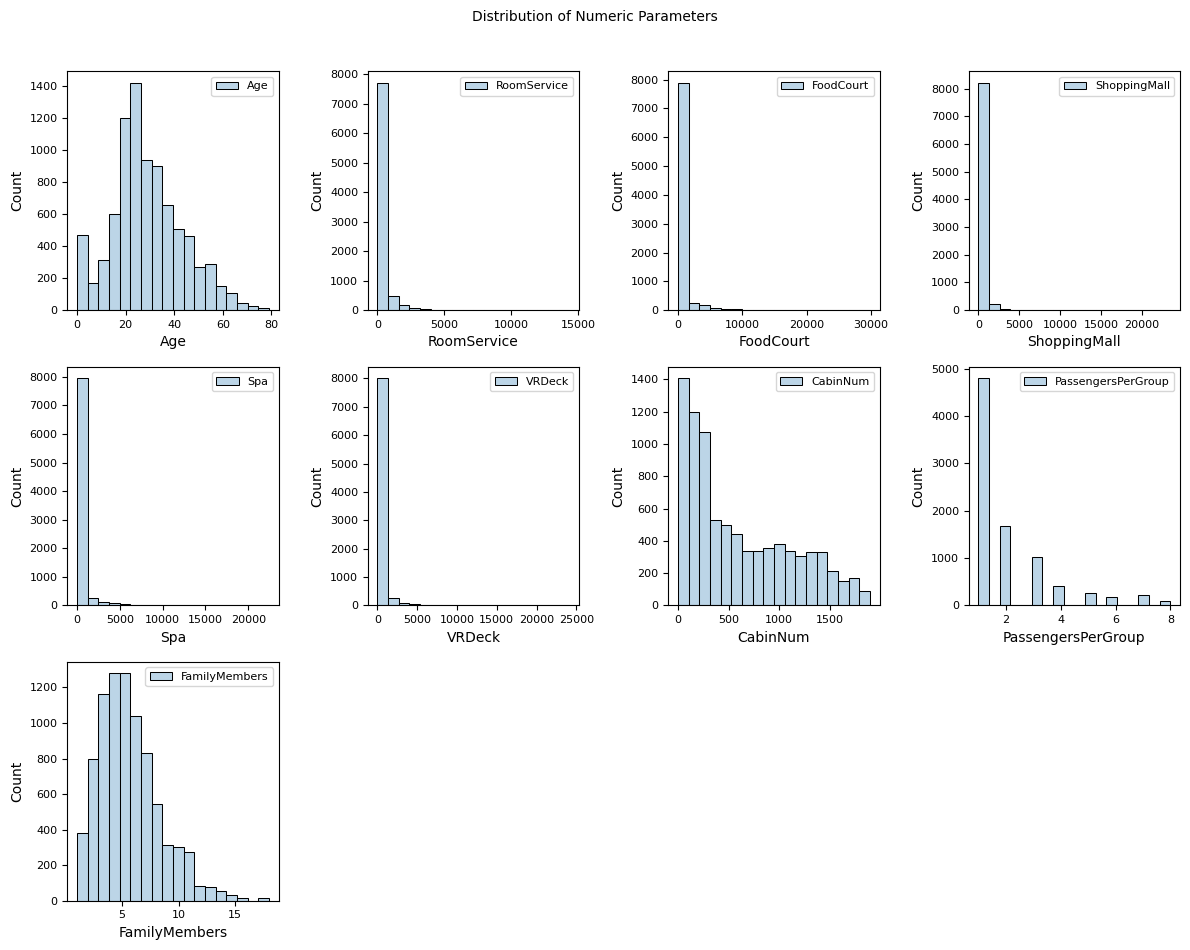

In [19]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))  
axes = axes.ravel()

numeric_cols = train.select_dtypes(['float64', 'int']).columns

for col, ax in zip(numeric_cols, axes):
    sns.histplot(data=train, ax=ax, x=col, label=col, bins=18)
    ax.legend()

for axes in [axes[-1], axes[-2], axes[-3]]:
    fig.delaxes(axes)
    
plt.tight_layout()
plt.suptitle('Distribution of Numeric Parameters', size='medium', y=1.05);

*Comments:*
* `Age` - has a distribution with two peaks - at age of ~1 and ~20. 
* `RoomService` - most of the passengers pay little for the room service, but there is a great skew towards high values meaning some passengers spend a lot on room service.
* `FoodCourt`/`ShoppingMall`/`Spa`/`VRDeck` - most passengers spend little on these features, however, some passengers spend very large sums. 
* `CabinNum` - this numeric feature should have a uniform distribution, as cabin number should not indicate any specific feature. However, the cabin numbers indicate that more passengers are didstributed in the lower cabin numbers. Maybe these numbers are associated with lower ticket class and more passengers are in these cabins than in higher number cabins. 
* `PassengersPerGroup` - the highest number of passengers per group is 8, with most of the passengers traveling alone.
* `FamilyMembers` - most of the passengers have ~5 relatives in the ship. However, there are families of 18 persons too. A small part of passengers are travelling alone.

As most passengers spend very little on services, it would be usefull to separate a new feature, indicating, if a passenger used services at all - if not, passenger's spending will be zero. Another parameter describing combined spendings on services may also benefit model predictions further away.

In [20]:
# adding column whether any services were used

imp = transformers.NoServiceUsers(['RoomService', 'FoodCourt', 'ShoppingMall', 
                                   'Spa', 'VRDeck'], 'NoServicesUsed')

train = imp.fit_transform(train)

AttributeError: module transformers has no attribute NoServiceUsers

In [77]:
# adding combined spending column

train['CombinedSpending'] = (
    train[['RoomService', 'FoodCourt', 
           'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
)

#### <a id='toc1_5_1_5_'></a>[Identify outliers](#toc0_)

In this case, most numerical features are not normally distributed therefore log transformation will be applied following z-score testing. This procedure will allow identifying outliers more robustly.

In [95]:
selected_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 
                 'Spa', 'VRDeck', 'CombinedSpending']

def log_transform(data: pd.DataFrame, selected_cols: List) -> pd.DataFrame:
    data = data.copy()
    for col in selected_cols:
        data[f'{col}Log'] = np.log10(data[col]+0.01)
    
    return data

train = log_transform(train, selected_cols)

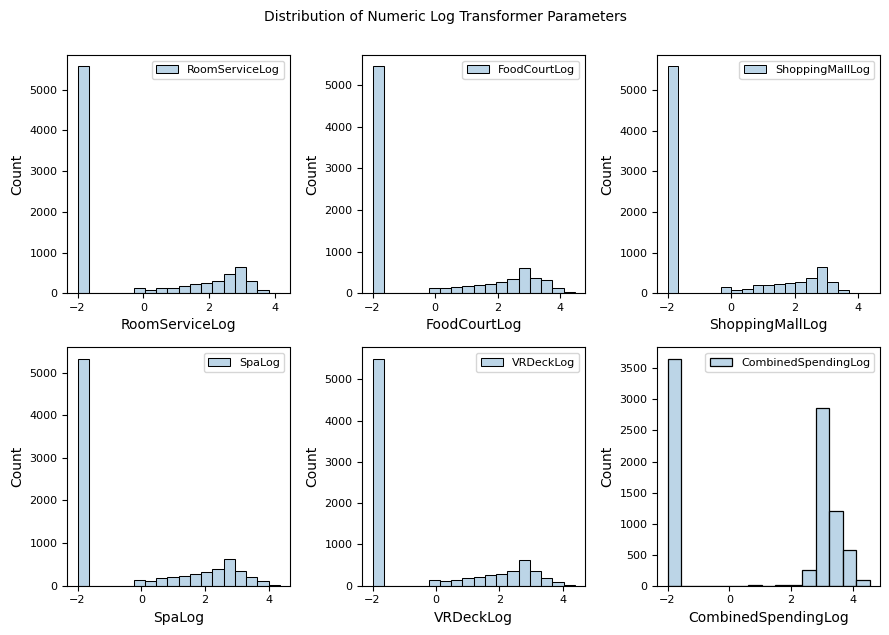

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))  
axes = axes.ravel()

numeric_cols = train.select_dtypes('float64').columns

for col, ax in zip(selected_cols, axes):
    sns.histplot(data=train, ax=ax, x=f'{col}Log', label=f'{col}Log')
    ax.legend()

plt.tight_layout()
plt.suptitle('Distribution of Numeric Log Transformer Parameters', 
             size='medium', y=1.05);

*Comments:*
* Log transformed features show bimodal distribution os passengers who did not use services and did not spend anything, and passengers that used services. 

In [83]:
outliers = fu.outliers_zscore(train, threshold=3)

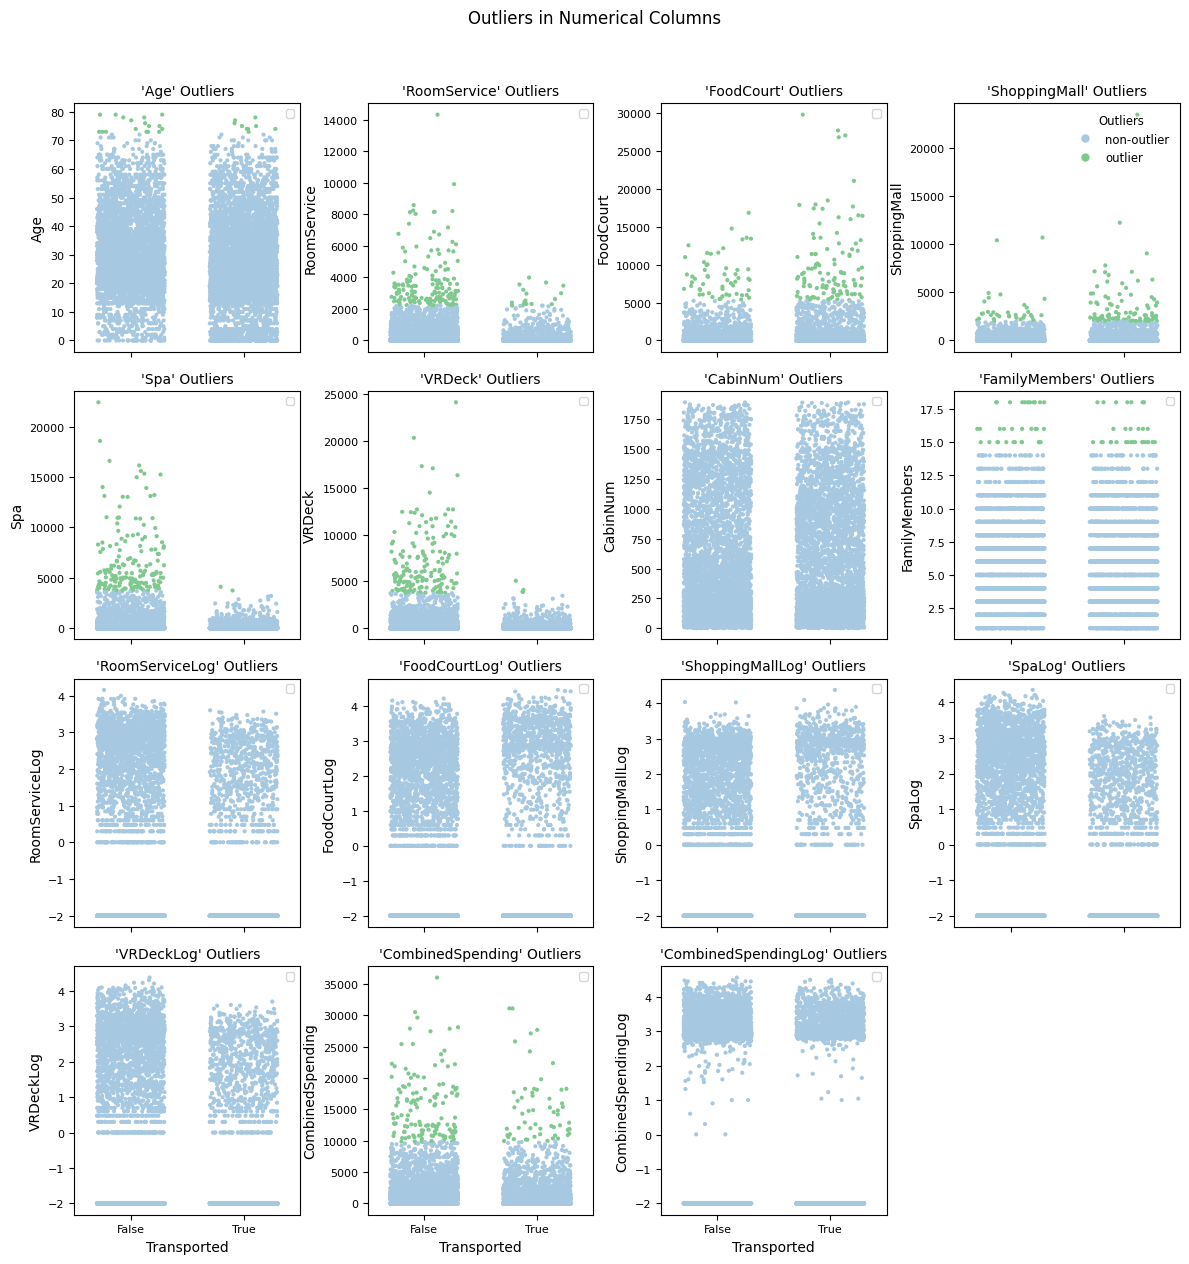

In [85]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12), sharex=True)
axes = axes.ravel()

numeric_cols_added = train.select_dtypes('float64')

for col, ax in zip(numeric_cols_added, axes):
    sns.stripplot(data=train, 
                    x='Transported',
                    y=col, ax=ax,
                    hue=outliers[f'{col}_outlier'].astype('str'),
                    jitter=0.3, size=3)
    ax.set_title(f"'{col}' Outliers", size='medium')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
            frameon=False, 
            title='Outliers', 
            title_fontsize='small', markerscale=2)

fig.delaxes(axes[-1])
    
plt.tight_layout()
plt.suptitle('Outliers in Numerical Columns', y=1.05);
plt.subplots_adjust(wspace=0.3)

*Comments:*
* `Age` - a small number of passengers are identified as outliers for their age. AS the number is small, it is reasonable to eliminate these rows.
* `RoomService`/`FoodCourt`/`ShoppingMall`/`Spa`/`VRDeck`/`CombinedSpending` - untransformed features present multiple outliers. However, after log transformation, non of the passengers are identified as outliers by their service spending record. 
* `CabinNum` - no values are identified as outliers.
* `FamilyMembers` - a small number of high family-number passenger groups are identified as outliers.

However, in this situation, only a small part of passengers are identified as outliers by age or number of family members, so these values will be retained as they are real values and may be useful for predictions too.

---

#### <a id='toc1_5_1_6_'></a>[Bin the numerical features](#toc0_)

Some of the numerical features are not normally distributed. Log transformation of such features improved the distribution properties of these features, however, binning of the passengers by these parameters might also simplify the predictive feature capabilities. 

In [88]:
selected_log_cols = ['RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 
                     'SpaLog', 'VRDeckLog']

for col in selected_log_cols:
    train[f'{col}Cut'] = pd.cut(train[col], 5, labels=np.linspace(1, 5, 5))

In [89]:
# cut 'CombinedSpending' into custom bins
train['CombinedSpendingCut'] = pd.cut(train[col], 6, labels=np.linspace(1, 6, 6))

In [90]:
# Make sure that the 1st bin in all transformed columns contain only -2 
# transformed from 0
for col in selected_log_cols:
    print(train.loc[train[f'{col}Cut']==1][f'{col}'].unique())

[-2.]
[-2.]
[-2.]
[-2.]
[-2.]


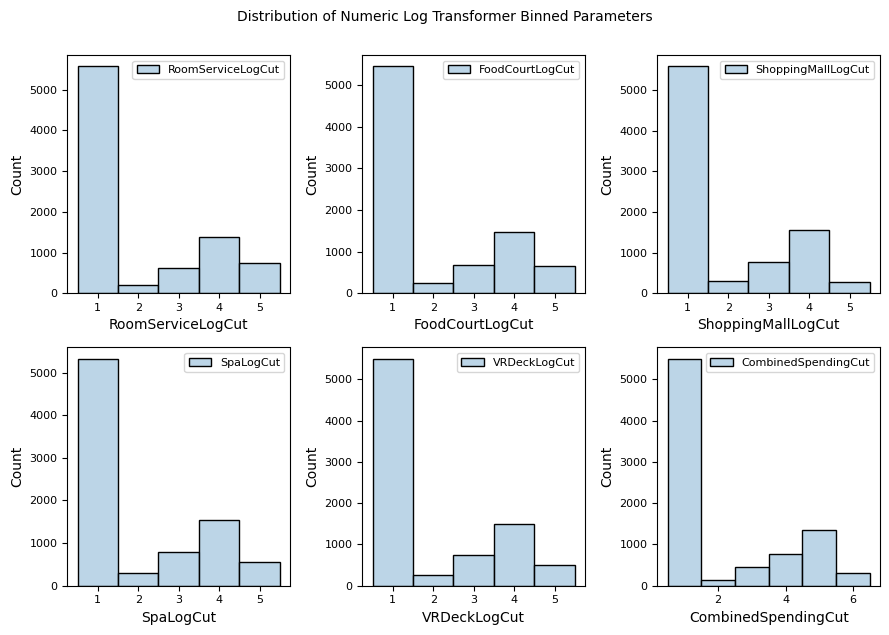

In [101]:
selected_cols = ['RoomServiceLogCut', 'FoodCourtLogCut', 'ShoppingMallLogCut', 
                     'SpaLogCut', 'VRDeckLogCut', 'CombinedSpendingCut']

fig, axes = plt.subplots(2, 3, figsize=(9, 6) )
axes = axes.ravel()

for col, ax in zip(selected_cols, axes):
    sns.histplot(data=train, ax=ax, x=col, label=col)
    ax.legend()

plt.tight_layout()
plt.suptitle('Distribution of Numeric Log Transformer Binned Parameters', 
             size='medium', y=1.05);

*Comment:* 
Binning the log-transformed service columns into cuts reasonably well simplifies the distribution of the data in each of these columns still retaining main information about the distribution. 

---

## <a id='toc1_6_'></a>[Exploratory Data Analysis](#toc0_)

In this part od analysis the main idea is to identify associations between differet passenger's features and transportation of passenger to another dimension.

---
### <a id='toc1_6_1_'></a>[Analyse, how different passenger parameters are associated with transportation to another dimension.](#toc0_)

#### <a id='toc1_6_1_1_'></a>[Categorical Feature Association with Transportation to Another Dimension](#toc0_)

In [92]:
selected_cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 
                        'CabinDeck', 'CabinSide','RoomServiceLogCut', 
                        'FoodCourtLogCut', 'ShoppingMallLogCut', 'SpaLogCut', 
                        'VRDeckLogCut', 'CombinedSpendingCut', 'NoServicesUsed']

In [21]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall  ...    Name  Transported CabinDeck  \
0          0.0        0.0           0.0  ...   Maham        False         B   
1        109.0        9.0          25.0  ...  Juanna         True         F   
2         43.0     3576.0           0.0  ...  Altark        False         A   
3          0.0     1283.0         371.0  ...   Solam        False         A   
4        303.0       70.0         151.0  ...   Willy         True         F   

   CabinNum CabinSide  PassengerGroup PassengerNumber PassengersPerGroup  \
0       0.0         P            0001              01                  1   
1       0.0         S            0002              01                  1   
2       0.0         S            0003              01                  2   
3       0.0         S            0003              02                  2   
4       1.0         S            0004              01                  1   

       Surname  FamilyMembers  
0    Ofracculy            1.0  
1        Vines            4.0  
2       Susent            6.0  
3       Susent            6.0  
4  Santantines            6.0  

[5 rows x 22 columns]

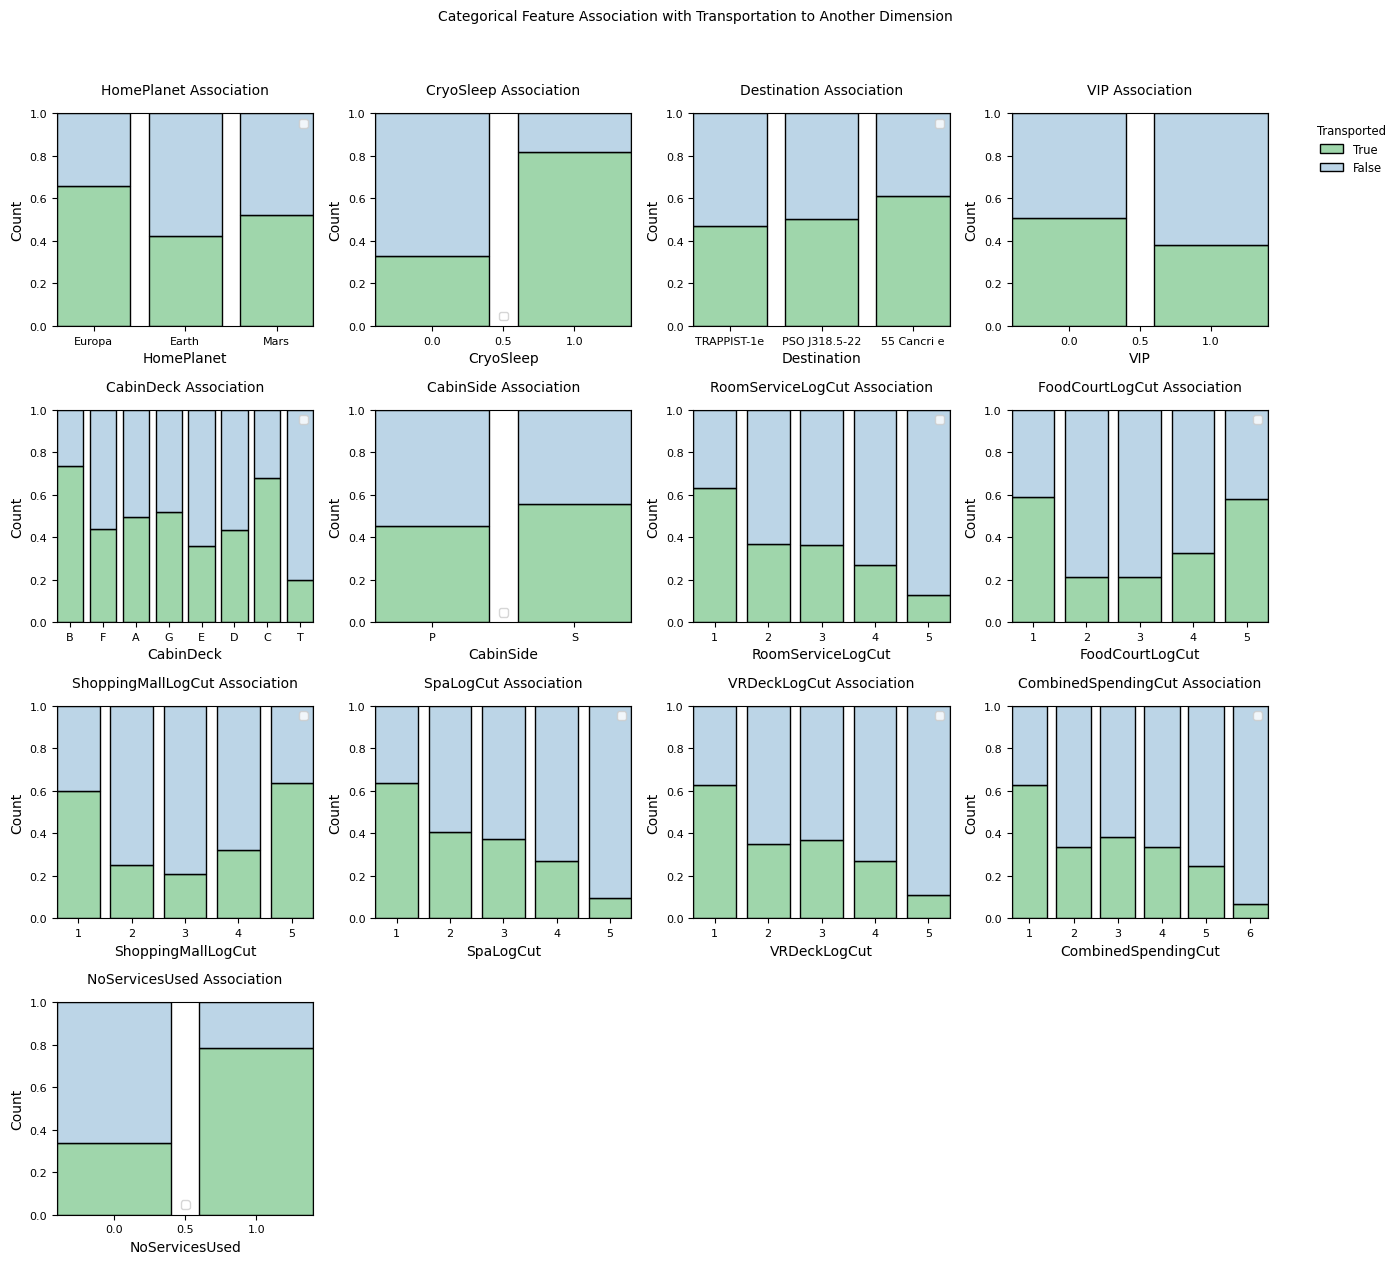

In [105]:
fig, axes = plt.subplots(4, 4, figsize=(14, 12))

axes = axes.ravel()

for col, ax in zip(selected_cat_columns, axes):
    pl.plot_association_hist(x=col, data=train, hue='Transported', ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
            frameon=False, bbox_to_anchor=(1.5, 1),
            title='Transported', labels=['True', 'False'],
            title_fontsize='small', markerscale=2)

for axes in [axes[-1], axes[-2], axes[-3]]:
    fig.delaxes(axes)

plt.tight_layout()
plt.suptitle('Categorical Feature Association with Transportation '
             'to Another Dimension', size='medium', y=1.05);

*Comments:*
* `HomePlanet` - passengers from Europa and Mars are more likely to be transported to another dimension compared to passengers from Earth.
* `CryoSleep` - passengers who were under cryo sleep were at least twice as likely to be transported to another dimension compared to passengers who were not under cryo sleep.
* `Destination` - passengers travelling to '55 Cancri e' were more likely to be transported to another dimension than passengers travelling to other destinations.
* `VIP` - VIP passengers were less likely to be transported to another dimension.
* `CabinDeck` - the most likely to be transported to another dimension were passengers from B and C decks. The least likely - from E deck.
* `CabinSide` - passengers staying in cabins of ship's S side were a little more likely to be transported to another dimension.
* `RoomServiceLogCut` - the more passengers spend on room services, the less likely they are to be transported to another dimension.
* `FoodCoutrtLogCut`/`ShoppingMallLogCut` - passengers spending the least and the most are more likely to be transported to another dimension.
* `SpaLogCut`/`VRDeckLogCut` - the more passengers spend on these services, the less likely they are to be transported to another dimension.
* `CombinedSpendingCut` - the more passengers spend in total for services, the less likely they are to be transported to another dimension.
* `NoServicesUsed` - passengers transported to another dimension were more likely to not spend anything on services.

---

#### <a id='toc1_6_1_2_'></a>[Numerical Feature Association with Transportation to Another Dimension](#toc0_)

In [147]:
selected_num_cols = ['Age', 'FamilyMembers', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
                     'VRDeck', 'CombinedSpending', 'CabinNum', 'RoomServiceLog', 
                     'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog', 
                     'CombinedSpendingLog']

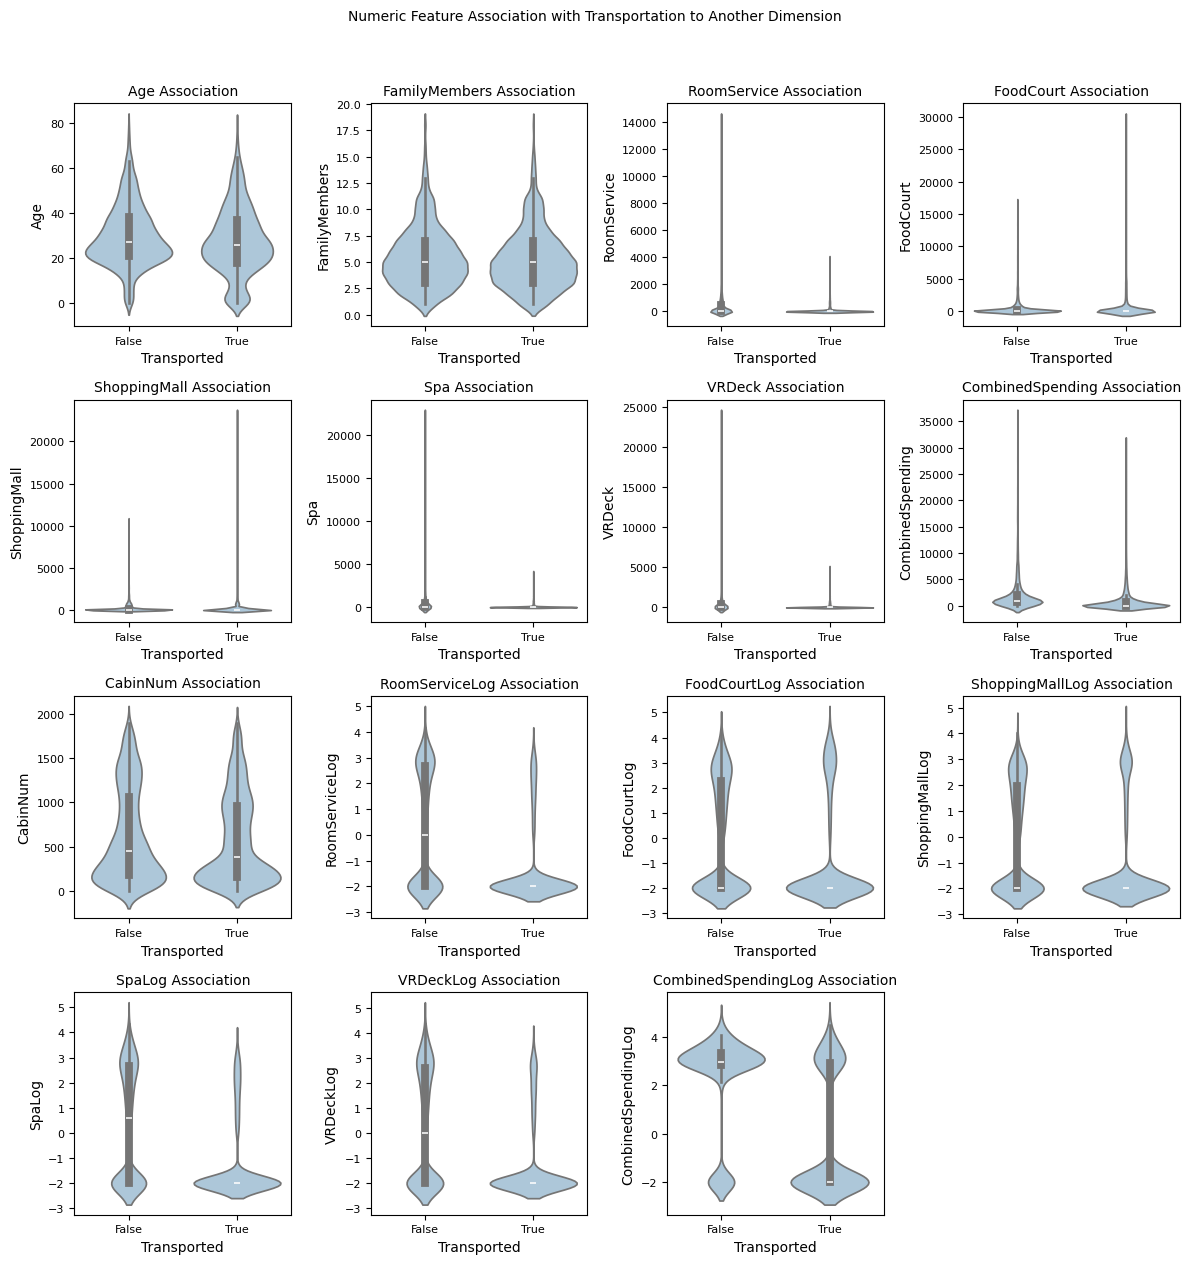

In [148]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

axes = axes.ravel()

for col, ax in zip(selected_num_cols, axes):
    sns.violinplot(data=train, x='Transported',
                y=col, ax=ax)
    ax.set_title(f'{col} Association', size='medium')

for axes in [axes[-1]]:
    fig.delaxes(axes)

plt.tight_layout()
plt.suptitle('Numeric Feature Association with Transportation to '
             'Another Dimension', size='medium', y=1.05);

*Comments:*
* `Age`/`FamilyMembers` - little or no association with beeing transported to another dimension, distributions for both groups are very similar.
* `RoomService`/`Spa`/`VRDeck` - as previously seen, passengers who are transported to another dimension spend less on room service, spa and VRDeck.
* `FoodCourt`/`ShoppingMall` - as previously seen in categorical comparisons, passengers who are transported to another dimension spend more on food and shopping.
* `CombinedSpending` - passengers spending less in total are more likely to be transported to another dimension.
* `CabinNum` - passengers are more likely to be transported to another dimension, if their cabin number is lower. 

---

### <a id='toc1_6_2_'></a>[Analyse how different passenger parameters are associated with each other](#toc0_)

#### <a id='toc1_6_2_1_'></a>[Age association with other categorical features in the dataset](#toc0_)

To identify if there is a significant difference between groups in each category column, Mann-Whitney U-test will be applied (in cases, where 2 distinct groups are available) or Kruskal-Wallis test will be applied (to test for difference in distributions, when there are more than 2 groups in a category).

* alpha significance values: 0.05

* H0: There is no difference between groups in a category.
* H1: There is a significant difference between groups in a category.

Tests will be applied to each category.

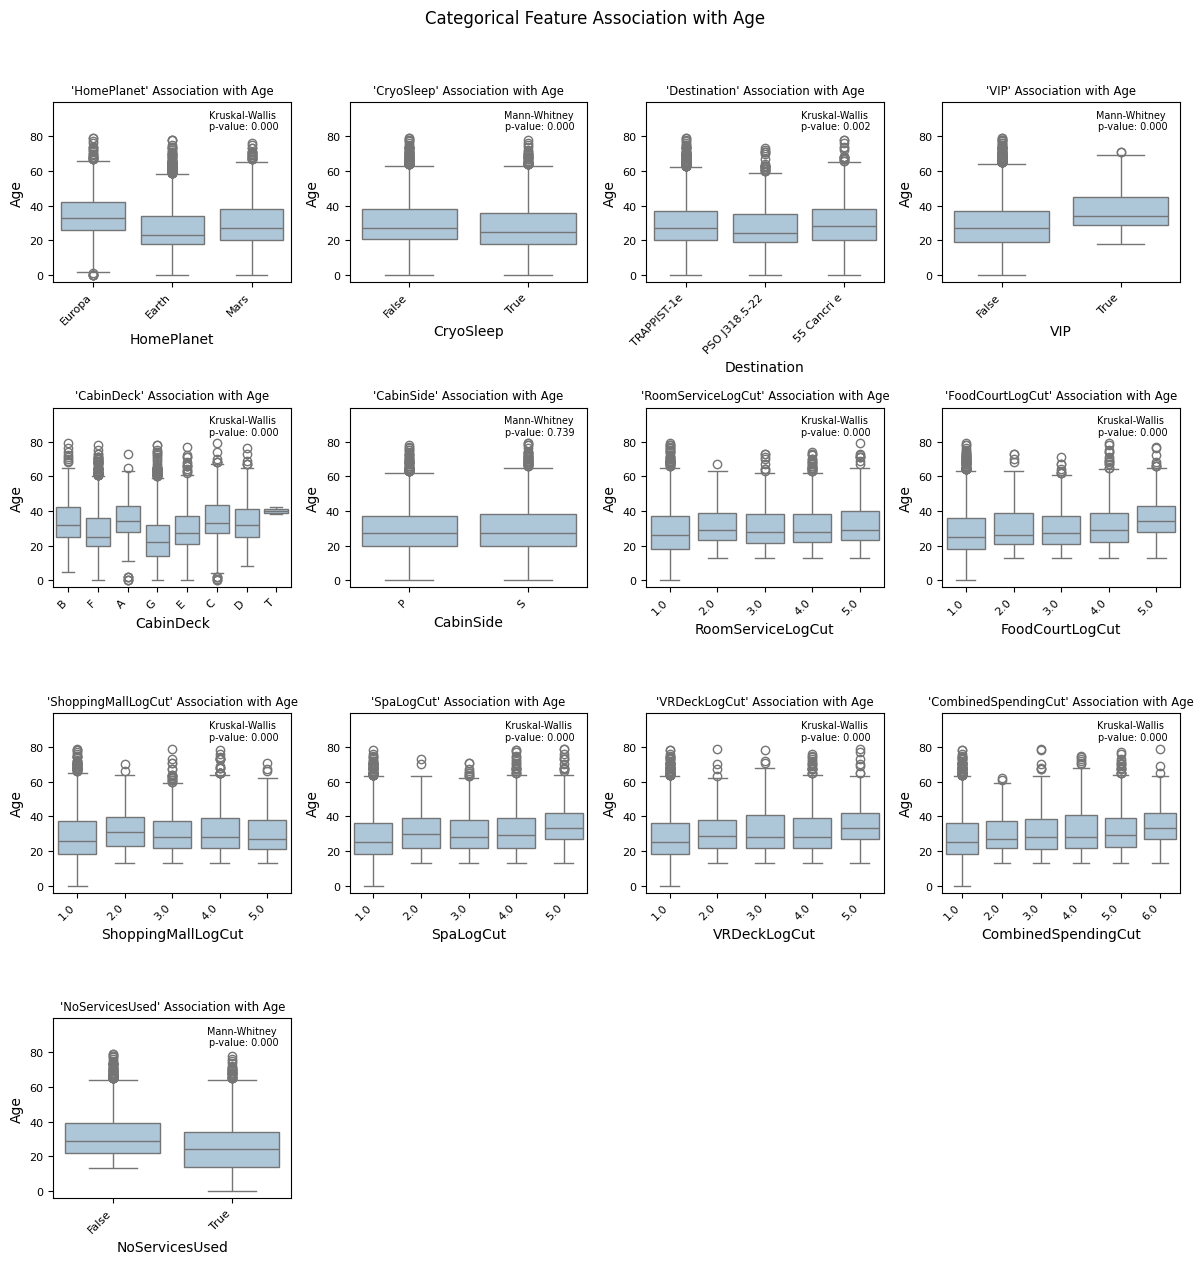

In [149]:
pl.boxplot_cat(train.dropna(), categoric_cols=selected_cat_columns, numerical_col='Age',
            text_addition='Association with Age',
            title='Categorical Feature Association with Age',
            nrows=4, ncols=4, figsize=(12, 12), delaxes=[-1, -2, -3])

*Comments:*

* `HomePlanet` - there is a significant difference between passenger groups in age distribution based on the home planet.
* `CryoSleep` - passengers who went under cryo sleep are a little younger than those passengers who did not. Difference between groups is significant.
* `Destination` - significant differences between groups in terms of age based on final destination.
* `VIP` - VIP passengers are older than non-VIP passengers. Difference between groups is significant.
* `CabinDeck` - F and G deck passengers are youngest, and T passengers are oldest. The differences between groups are significant.
* `CabinSide` - no significant difference in terms of passenger age.
* `RoomServiceLogCut`/`FoodCourtLogCut`/`ShoppingMallLogCut`/`SpaLogCut`/`VRDeckLogCut` - passengers spending the most for these services are oldest. Those who spend lowest are youngest on average, but the age gap between youngest and oldest in this group is also the widest. 
* `NoServicesUsed` - passengers who did not use services were younger than those who did.
* `CombinedServicesLogCut` - passengers spending more in total are older than those spending less.

These findings are not really helping to impute missing `Age` values. As significant differences are found between groups in many categories, I select `CabinDeck` as groupping parameter for imputation. `Age` values will be imputed by median in each `CabinDeck`.

In [109]:
imp = transformers.ColumnImputer(['CabinDeck'], 'Age', strategy='median')
train = imp.fit_transform(train)

In [110]:
train['Age'].isna().sum()

4

In [111]:
imp = SimpleImputer(strategy='median')
train['Age'] = imp.fit_transform(train[['Age']])[:, 0]

In [112]:
train['Age'].isna().sum()

0

---

#### FamilyMembers association with passenger features

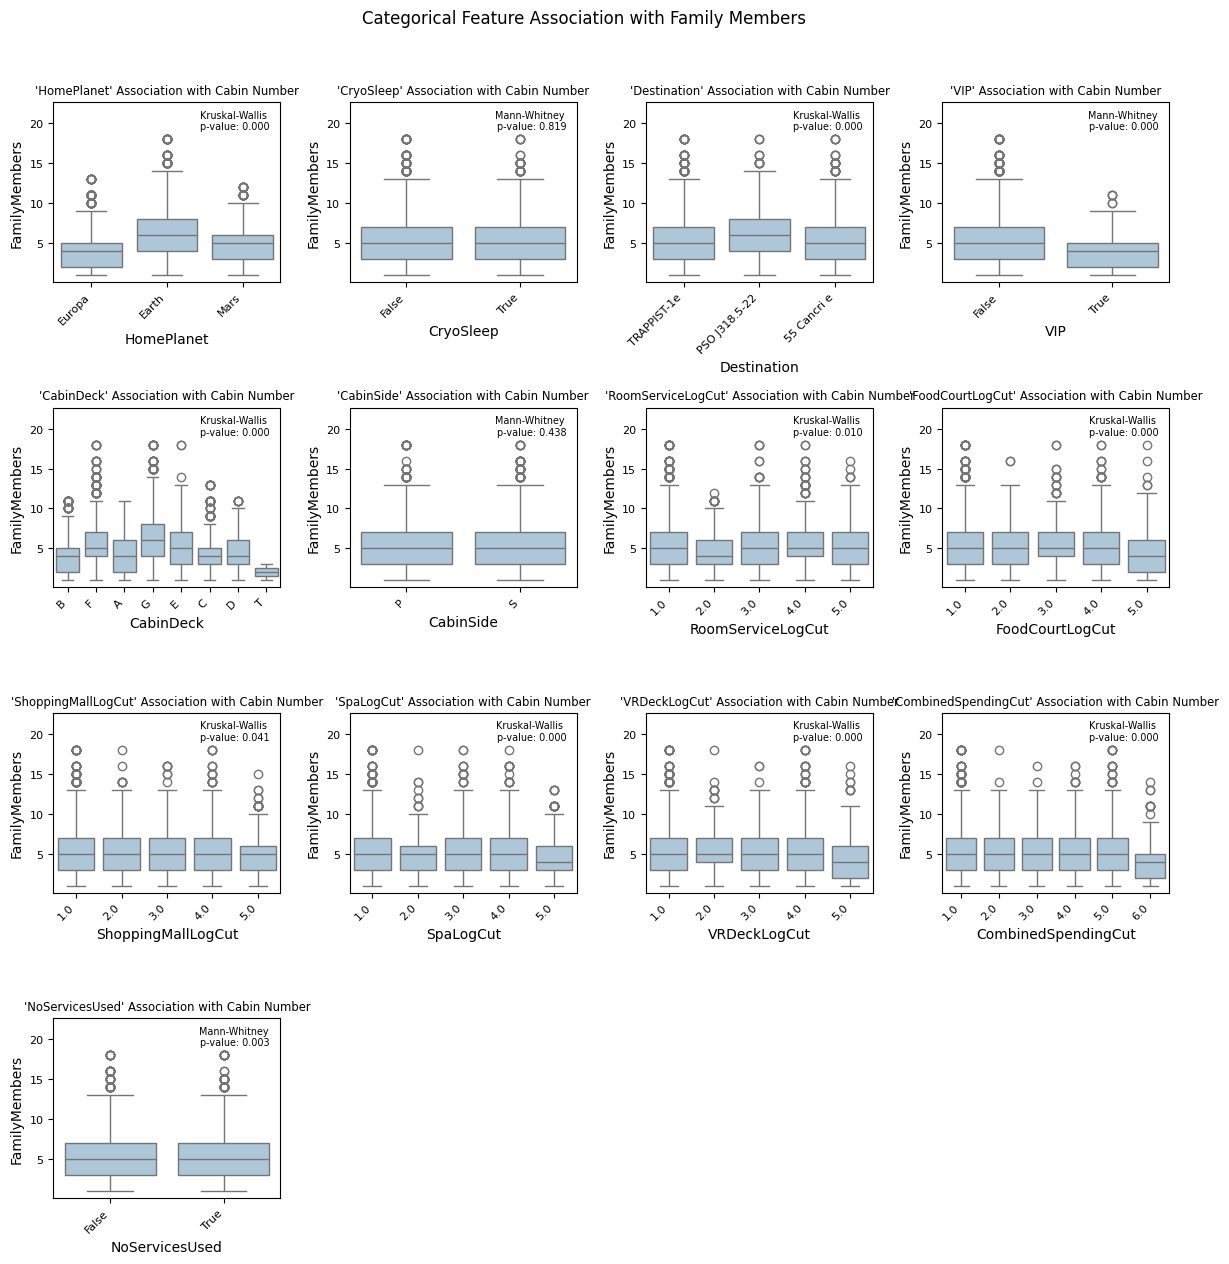

In [150]:
pl.boxplot_cat(train.dropna(), categoric_cols=selected_cat_columns, 
               numerical_col='FamilyMembers',
               text_addition='Association with Cabin Number',
               title='Categorical Feature Association with Family Members',
               nrows=4, ncols=4, figsize=(12, 12), delaxes=[-1, -2, -3])

*Commens:*

* Passengers from Europa are in smaller families compared to those passengers from Earth and Mars. Earth passengers come in biggest fammilies.
* VIP passengers are in smaller families.

---

#### <a id='toc1_6_2_2_'></a>[Cabin number association with passenger features](#toc0_)

Previous data review showed that there might be some association between cabin number and passengers beeing transported to another dimension. Although it is not reasonable to believe that cabin number could have some indication for this, but there might be associations between cabin number and where these cabins are located, passengers, who are using these cabins, their spendings on services and other possible associations. 

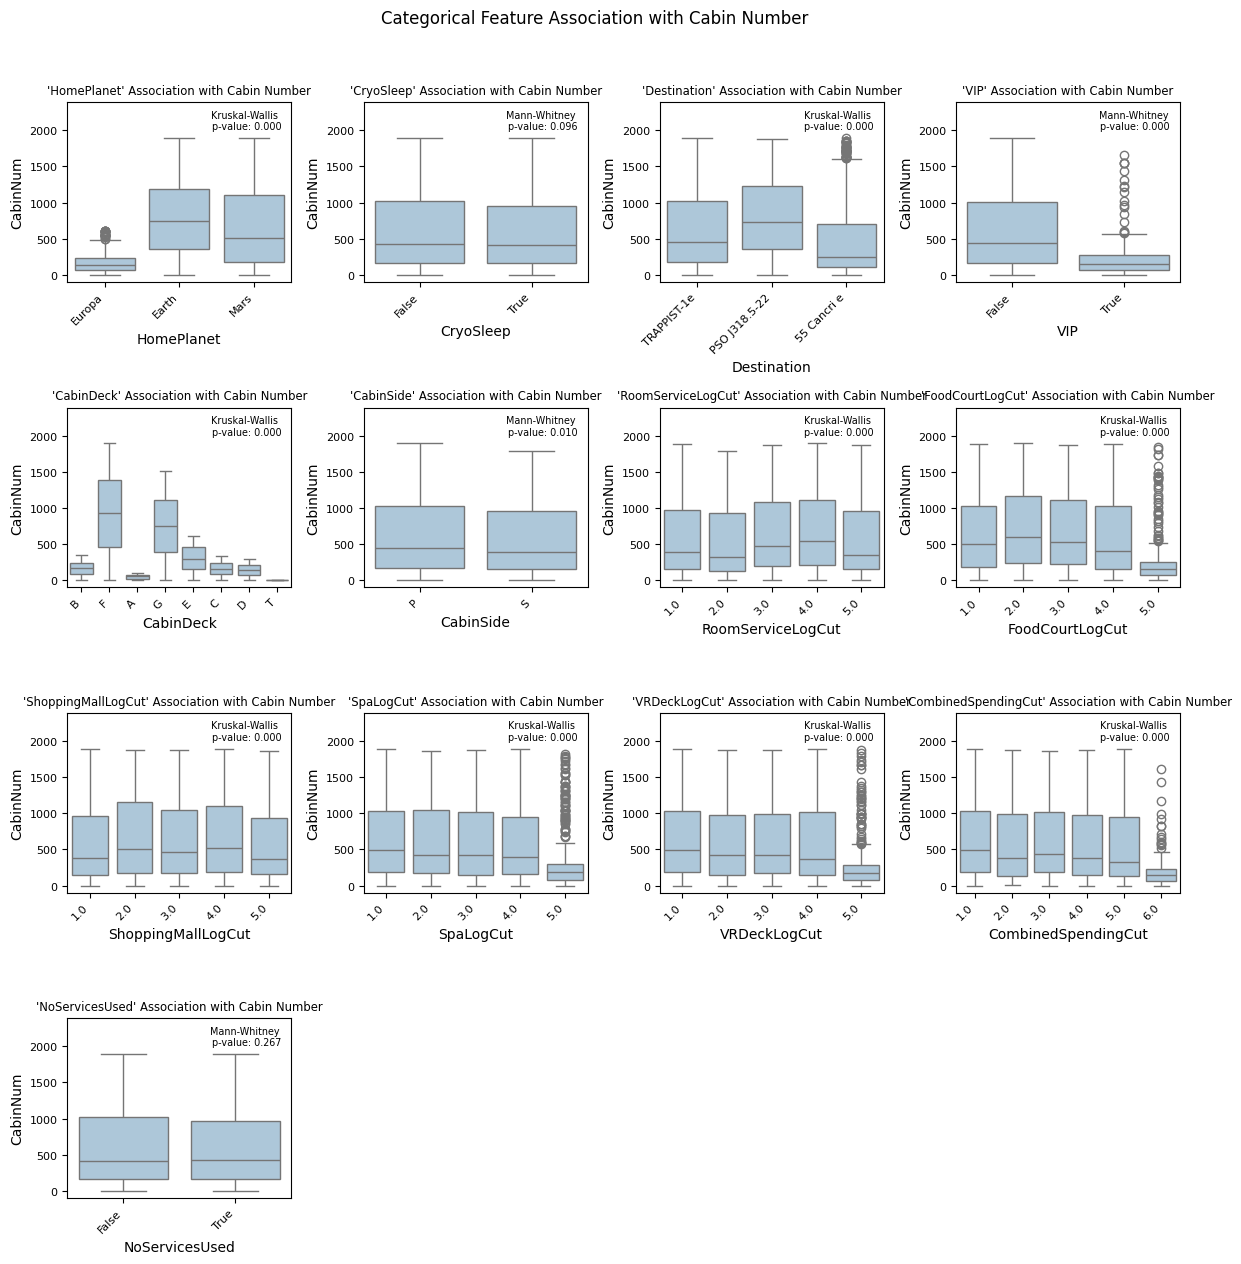

In [116]:
pl.boxplot_cat(train.dropna(), categoric_cols=selected_cat_columns, 
               numerical_col='CabinNum',
               text_addition='Association with Cabin Number',
               title='Categorical Feature Association with Cabin Number',
               nrows=4, ncols=4, figsize=(12, 12), delaxes=[-1, -2, -3])

*Comments:*

* `HomePlanet` - passengers from Europa are generally located in the lower cabin numbers, compared to passengers from Earch or Mars. The difference is significant.
* `CryoSleep` - no significant difference between groups.
* `Destination` - on average, passengers travelling to 55 Cancri e are located more in lower cabin numbers. Difference with other passenger groups is significant.
* `VIP` - VIP passengers are generally located in the lower cabin numbers. Difference between groups is significant.
* `CabinDeck` - lower cabin numbers are located in A, B, C, D and T decks. Probably there is a sequence of deck and cabin number that follows.
* `CabinSide` - similar cabin numbers are located in both sides of the spaceship, although the difference is significant.
* `RoomServiceLogCut`/`ShoppingMallLogCut` - although the differences between groups in Cabin number are significant, passengers spending different amounts for room service or shopping are located in similar cabin numbers.
* `FoodCourtLogCut`/`SpaLogCut`/`VRDeckLogCut` - groups of passengers from 1 to 4 that spend from small to quite high amounts of food, spa or VR, are located in similar cabin numbers. Passengers spending the highest amounts are located in lower cabin numbers.
* `CombinedSpendingCut` - passengers spending more live in lower number cabins.
* `NoServicesUsed` - no differences between groups in terms of cabin number.

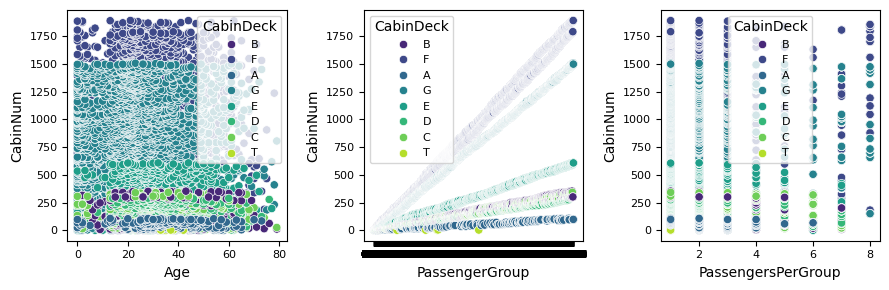

In [ ]:
selected_cols = ['Age', 'PassengerGroup', 'PassengersPerGroup']

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes = axes.ravel()

for col, ax in zip(selected_cols, axes):
    sns.scatterplot(train, x=col, y='CabinNum', ax=ax, hue='CabinDeck', 
                    palette='viridis')

plt.tight_layout()


*Comment:*
* Passengers in the same CabinDeck show linear trend between PassengerGroup and CabinNum meaning we can impute CabinNum values by PassengerGroup values.

In [119]:
# Do passengers in the same group are in the same CabinNum?

cabins_per_group = (
    train.groupby(['PassengerGroup', 'CabinNum'])['CabinNum']
    .size()
    .reset_index(name='Count')
)
cabin_num_counts = cabins_per_group.groupby('PassengerGroup')['CabinNum'].size().reset_index()
cabin_num_counts.groupby('CabinNum')['CabinNum'].size()

CabinNum
1    5698
2     399
3      21
Name: CabinNum, dtype: int64

*Comment:*
* 420 passengers are located not in the same cabin while in the same PassengerGroup, however, most passengers are located in the same CabinNum meaning we can impute missing CabinNum values by PassengerGroup with a good confidence. However, in this situation, imputation by regression will be applied based on PassengerGroup number and CabinDeck. And before regression imputation, we need to fill missing CabinDeck values.

---

#### <a id='toc1_6_2_3_'></a>[CabinDeck association with passenger parameters](#toc0_)

In [120]:
# Do passengers in the same group are in the same CabinDeck?
decks_per_group = (
    train.groupby(['PassengerGroup', 'CabinDeck'])['CabinDeck']
    .size()
    .reset_index(name='Count')
)
deck_num_counts = decks_per_group.groupby('PassengerGroup')['CabinDeck'].size().reset_index()
deck_num_counts.groupby('CabinDeck')['CabinDeck'].size()

CabinDeck
1    5697
2     400
3      21
Name: CabinDeck, dtype: int64

*Comment:*
* 421 Passengers are located not in the same CabinDeck while in the same PassengerGroup, however, most passengers are located in the same CabinDeck meaning we can impute missing CabinDeck values by PassengerGroup with a good confidence.

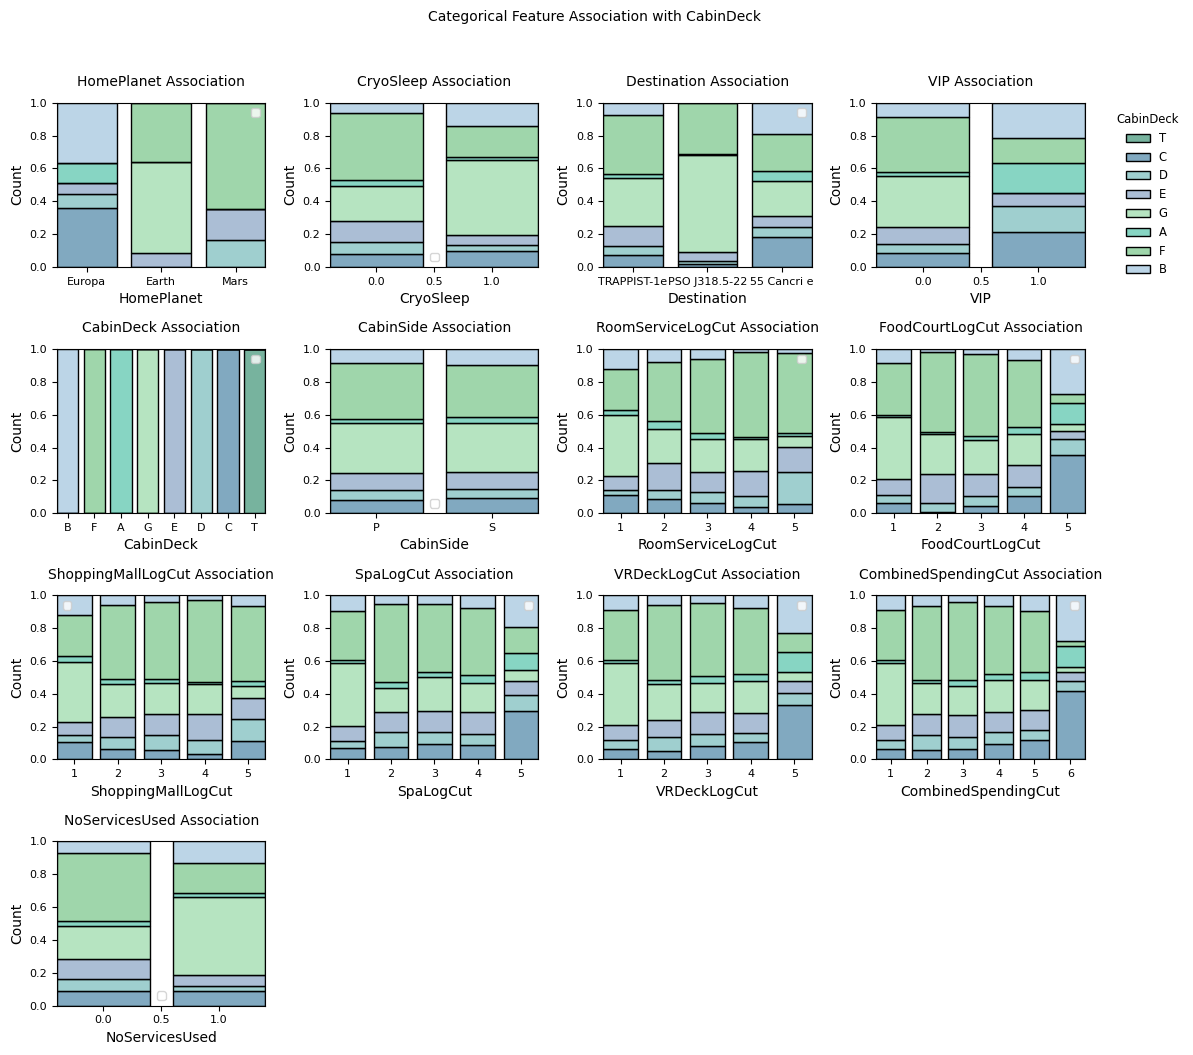

In [126]:
fig, axes = plt.subplots(4, 4, figsize=(12, 10))

axes = axes.ravel()

for col, ax in zip(selected_cat_columns, axes):
    pl.plot_association_hist(x=col, data=train, hue='CabinDeck', ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
               bbox_to_anchor=(1.5, 1), 
               frameon=False, 
               title='CabinDeck', labels=['T','C', 'D', 'E', 'G', 'A', 'F', 'B'],
               title_fontsize='small', markerscale=2)

for axes in [axes[-1], axes[-2], axes[-3]]:
    fig.delaxes(axes)

plt.tight_layout()
plt.suptitle('Categorical Feature Association with CabinDeck',
             size='medium', y=1.05);

*Comments:*
* `HomePlanet` - passengers coming from Europa are equaly likely to be located in Deck B or C and less likely to be located in other decks. Passengers from Earth are most likely to be located in deck G, a little less likely - in deck F or E and unlikely in other decks. Passengers from Mars are most likely to be located in deck F. 
* Other features show some association with CabinDeck, however the association is more complicated and cannot be used for data imputation. 

`CabinDeck` will be imputed by `PassengerGroup` first for passengers travelling not alone, and then by most frequent `CabinDeck` by `HomePlanet`.

In [127]:
train['CabinDeck'].isna().sum()

199

In [128]:
imp = transformers.ColumnImputer(['PassengerGroup'], 'CabinDeck')
train = imp.fit_transform(train)

In [129]:
train['CabinDeck'].isna().sum()

99

In [130]:
imp = transformers.ColumnImputer(['HomePlanet'], 'CabinDeck')
train = imp.fit_transform(train)

In [131]:
train['CabinDeck'].isna().sum()

4

In [132]:
imp = SimpleImputer(strategy='most_frequent')
train['CabinDeck'] = imp.fit_transform(train[['CabinDeck']])[:, 0]

In [133]:
train['CabinDeck'].isna().sum()

0

*Comments:*

* After CabinDeck imputation, we can impute missing CabinNum values based on linear association between PassengerGroup number in CabinDeck and CabinNum.

In [134]:
imp = transformers.RegressionImputer('CabinNum', 'PassengerGroup', 'CabinDeck')
train = imp.fit_transform(train)

In [135]:
train['CabinNum'].isna().sum()

0

---

#### <a id='toc1_6_2_4_'></a>[CabinSide association with passenger parameters](#toc0_)

In [136]:
# Do passengers in the same PassengerGroup are in the same CabinSide?
sides_per_group = (
    train.groupby(['PassengerGroup', 'CabinSide'])['CabinSide']
    .size()
    .reset_index(name='Count')
)
side_num_counts = sides_per_group.groupby('PassengerGroup')['CabinSide'].size().reset_index()
side_num_counts.groupby('CabinSide')['CabinSide'].size()

CabinSide
1    6118
Name: CabinSide, dtype: int64

*Comment:*
* All passengers from the same PassengerGroup are located in the same CabinSide, meaning we can impute CabinSide by PassengerGroup without mistakes.

In [137]:
train['CabinSide'].isna().sum()

199

In [138]:
imp = transformers.ColumnImputer(['PassengerGroup'], 'CabinSide')
train = imp.fit_transform(train)

In [139]:
train['CabinSide'].isna().sum()

99

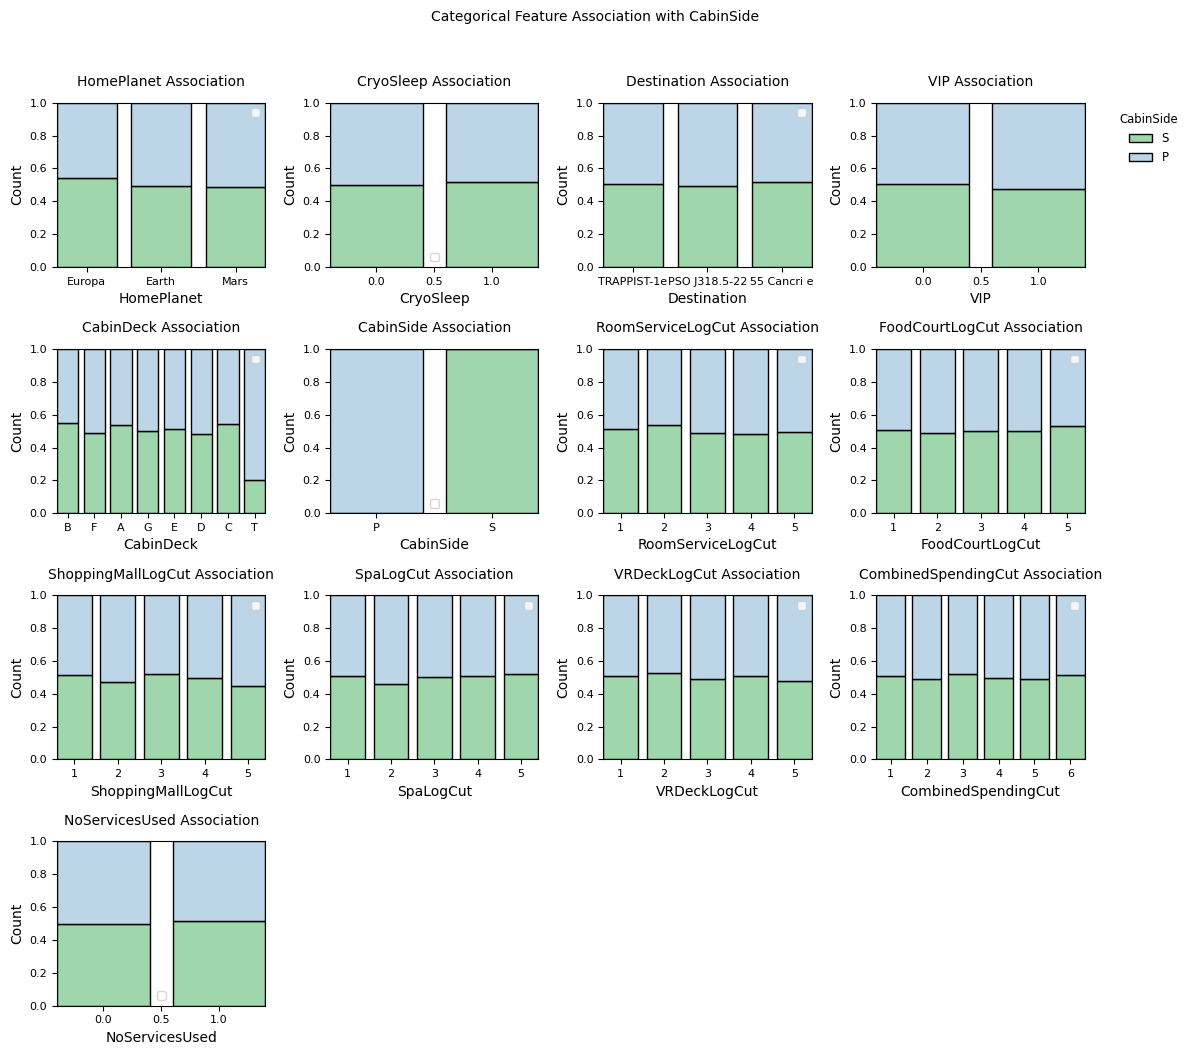

In [142]:
fig, axes = plt.subplots(4, 4, figsize=(12, 10))

axes = axes.ravel()

for col, ax in zip(selected_cat_columns, axes):
    pl.plot_association_hist(x=col, data=train, hue='CabinSide', ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
               bbox_to_anchor=(1.5, 1), 
               frameon=False, 
               title='CabinSide', labels=['S', 'P'],
               title_fontsize='small', markerscale=2)

for axes in [axes[-1], axes[-2], axes[-3]]:
    fig.delaxes(axes)
    
plt.tight_layout()
plt.suptitle('Categorical Feature Association with CabinSide',
             size='medium', y=1.05);

*Comments:*
* Categorical features do not show any association with CabinSide

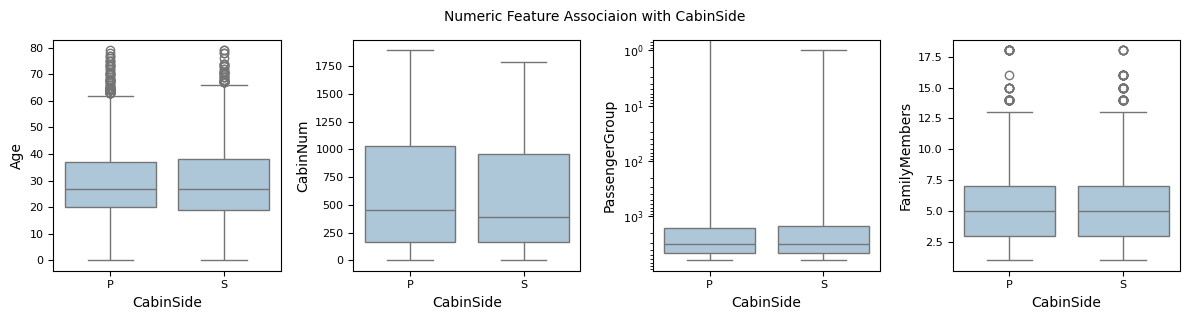

In [144]:
selected_cols = ['Age', 'CabinNum', 'PassengerGroup', 'FamilyMembers']

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.ravel()

for col, ax in zip(selected_cols, axes):
    sns.boxplot(train, x='CabinSide', y=col, ax=ax)

axes[2].set_yscale('log')
plt.tight_layout()
plt.suptitle('Numeric Feature Associaion with CabinSide', size='medium', y=1.05);

*Comment:*

* There is no association with CabinSide neither with passengers' numeric, nor categoric features. To impute missing remaining missing values, the most frequent method will be applied.

In [145]:
imp = SimpleImputer(strategy='most_frequent')
train['CabinSide'] = imp.fit_transform(train[['CabinSide']])[:, 0]

In [146]:
train['CabinSide'].isna().sum()

0

---

#### <a id='toc1_6_2_5_'></a>[HomePlanet association with other categorical features](#toc0_)

`HomePlanet` column contains missing values. To impute as correctly as possible, review, how other features are associated with `HomePlanet`. Numeric features did not show significant associations with HomePlanet in previous plots, so here I will concentrate more on categorical features.

In [153]:
home_planet_association_columns = ['CryoSleep', 'Destination', 'VIP', 
                                   'CabinDeck', 'CabinSide', 'RoomServiceLogCut', 
                                   'FoodCourtLogCut', 'ShoppingMallLogCut', 
                                   'CombinedSpendingCut', 'SpaLogCut', 
                                   'VRDeckLogCut', 'NoServicesUsed']

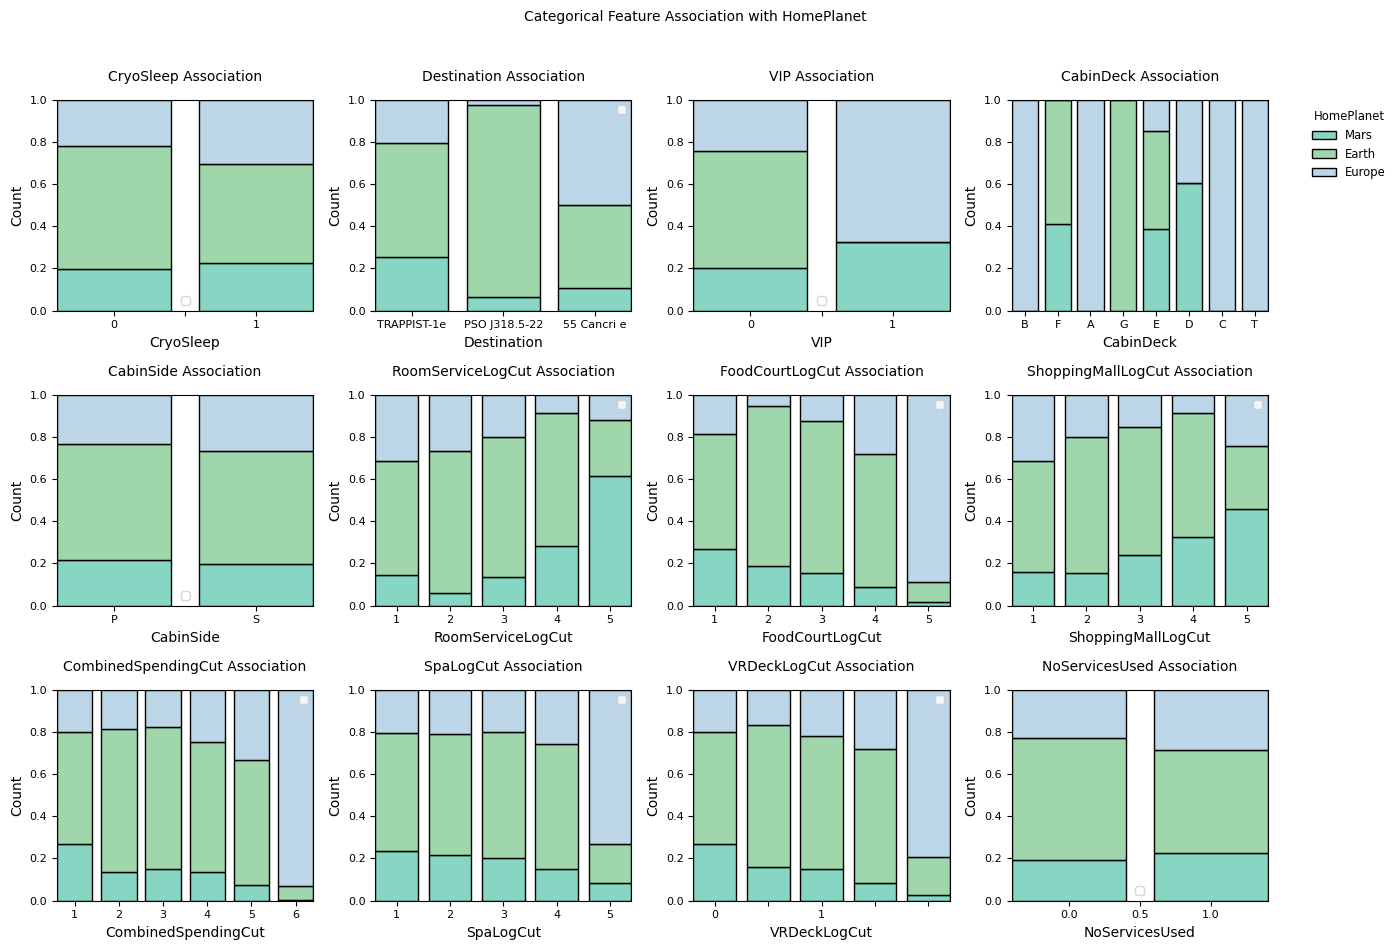

In [158]:
fig, axes = plt.subplots(3, 4, figsize=(14, 9))

axes = axes.ravel()

for col, ax in zip(home_planet_association_columns, axes):
    pl.plot_association_hist(x=col, data=train, hue="HomePlanet", ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
            frameon=False, bbox_to_anchor=(1.5, 1),
            title='HomePlanet', labels=['Mars', 'Earth', 'Europe', 'False'],
            title_fontsize='small', markerscale=2)

for ax in [axes[0], axes[2], axes[10]]:
    ax.set_xticklabels(['', '0', '', '1'])

# fig.delaxes(axes[-1])
    
plt.tight_layout()
plt.suptitle('Categorical Feature Association with HomePlanet',
              size='medium', y=1.05);

*Comments:*

* `CryoSleep` does not show any association with HomePlanet
* `Destination` - almost all passengers travelling to PSO J318.5-22 are from Earth - that might be a helpful imputation association.
* `VIP` - only passengers from Mars and Europa have VIP status. However, it does not help for imputation.
* `CabinDeck` - Decks B, A, G, C, and T show good association with HomePlanet - all passengers in theses decks are from the same planets.
* `CabinSide` - this feature does not help for imputation.
* Binned `RoomService`/`FoodCourt`/`ShoppingMall`/`Spa`/`VRDeck` features show trends of association with HomePlanet but do not help for the imputation of missing values.
* `CombinedSpendingCut` - passengers from Earth are almost equaly distributed in 1-5 bins of spending. Proportion of passengers is increasing as the amount spend on services increases. 
* `NoServicesUsed` - no significant association with `HomePlanet`.

In [159]:
# Do passengers from the same group, come from the same planet?

home_planet_counts = (
    train.groupby(['PassengerGroup', 'HomePlanet'])['HomePlanet']
    .size()
    .reset_index(name='Count')
)

sum(home_planet_counts.groupby('PassengerGroup').size() > 1)


0

*Comments:*

* Passengers from the same PassengerGroup are from the same planet, meaning we can impute the data in HomePlanet column based on PassengerGroup HomePlanet. However, this imputation is not enough to cover all missing values as some of the passengers are travelling alone, meaning there is only one passenger in PassengerGroup and no HomePlanet to impute by. In these cases, missing values will be imputed by the most common HomePlanet in the CabinDeck. 

In [160]:
# Impute by the most common HomePlanet based on PassengerGroup
imputer = transformers.ColumnImputer(['PassengerGroup'], 'HomePlanet')

train = imputer.fit_transform(train)

In [161]:
# Impute by the most common HomePlanet based on CabinDeck

imputer = transformers.ColumnImputer(['CabinDeck'], 'HomePlanet')

In [162]:
train = imputer.fit_transform(train)

In [163]:
train['HomePlanet'].isna().sum()

0

In [164]:
# Impute by the most common HomePlanet based on HomePlanet
imputer = SimpleImputer(strategy='most_frequent')

In [165]:
train['HomePlanet'] = imputer.fit_transform(train[['HomePlanet']])[:, 0]

In [166]:
train['HomePlanet'].isna().sum()

0

---

#### <a id='toc1_6_2_6_'></a>[CryoSleep association with passenger features](#toc0_)

In [167]:
cryo_sleep_association_columns = ['Destination', 'VIP', 
                                   'CabinDeck', 'CabinSide', 'RoomServiceLogCut', 
                                   'FoodCourtLogCut', 'ShoppingMallLogCut', 
                                   'CombinedSpendingCut', 'SpaLogCut', 
                                   'VRDeckLogCut', 'NoServicesUsed']

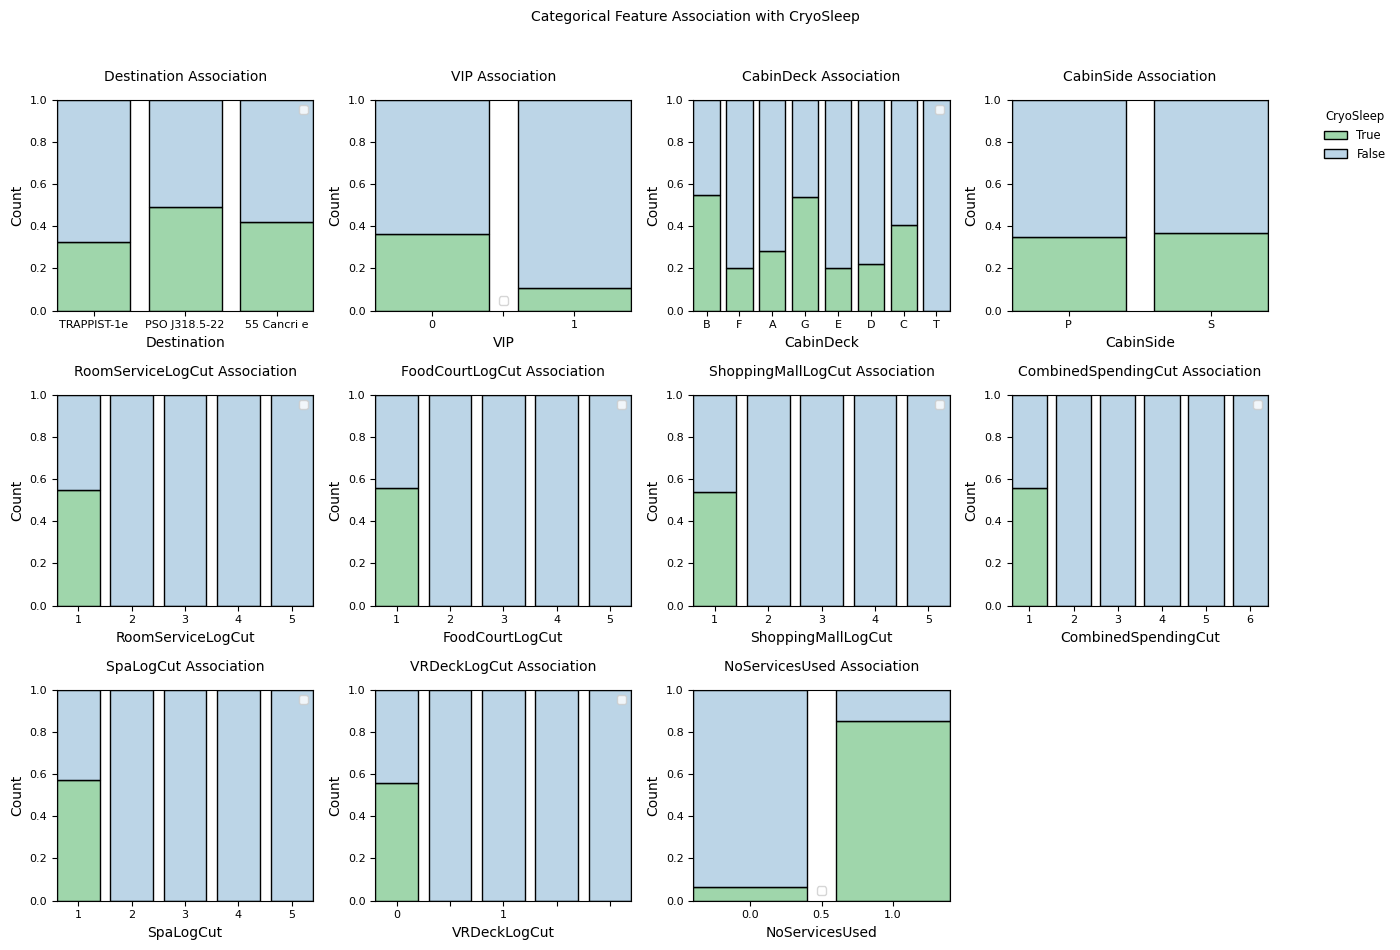

In [172]:
fig, axes = plt.subplots(3, 4, figsize=(14, 9))

axes = axes.ravel()

for col, ax in zip(cryo_sleep_association_columns, axes):
    pl.plot_association_hist(x=col, data=train, hue="CryoSleep", ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
            frameon=False, bbox_to_anchor=(1.5, 1),
            title='CryoSleep', labels=['True', 'False'],
            title_fontsize='small', markerscale=2)

for ax in [axes[1], axes[9]]:
    ax.set_xticklabels(['', '0', '', '1'])

for axes in [axes[-1]]:
    fig.delaxes(axes)

plt.tight_layout()
plt.suptitle('Categorical Feature Association with CryoSleep',
              size='medium', y=1.05);

*Comments:*

* `Destination` - no specific association with `CryoSleep`
* `VIP` - VIP passengers are less likely to go under `CryoSleep` - that may be usefull for imputation.
* `CabinDeck` - T, F, A, E and D deck passengers are less likely to go under `CryoSleep`. 
* `CabinSide` - no specific association with `CryoSleep`
* Binned `RoomService`/`FoodCourt`/`ShoppingMall`/`Spa`/`VRDeck`/`CombinedSpending` show that only passengers from the first bin have been in `CryoSleep` - meaning that only passengers that spend very low amounts on services have been in CryoSleep. 
* `NoServicesUsed` - most of the passengers who did not use services, were in `CryoSleep`. Conversly, most of the passengers who used services, were not in `CryoSleep`. So we can impute `CryoSleep` based on whether passengers used any services.

In [173]:
train['CryoSleep'].isna().sum()

217

In [174]:
imp = transformers.ColumnImputer(['NoServicesUsed'], 'CryoSleep')
train = imp.fit_transform(train)

In [175]:
train['CryoSleep'].isna().sum()

0

---

#### <a id='toc1_6_2_7_'></a>[Destination association with passenger features](#toc0_)

In [176]:
destination_association_columns = ['VIP', 'CabinDeck', 'CabinSide', 
                                   'RoomServiceLogCut', 
                                   'FoodCourtLogCut', 'ShoppingMallLogCut', 
                                   'CombinedSpendingCut', 'SpaLogCut', 
                                   'VRDeckLogCut', 'NoServicesUsed']

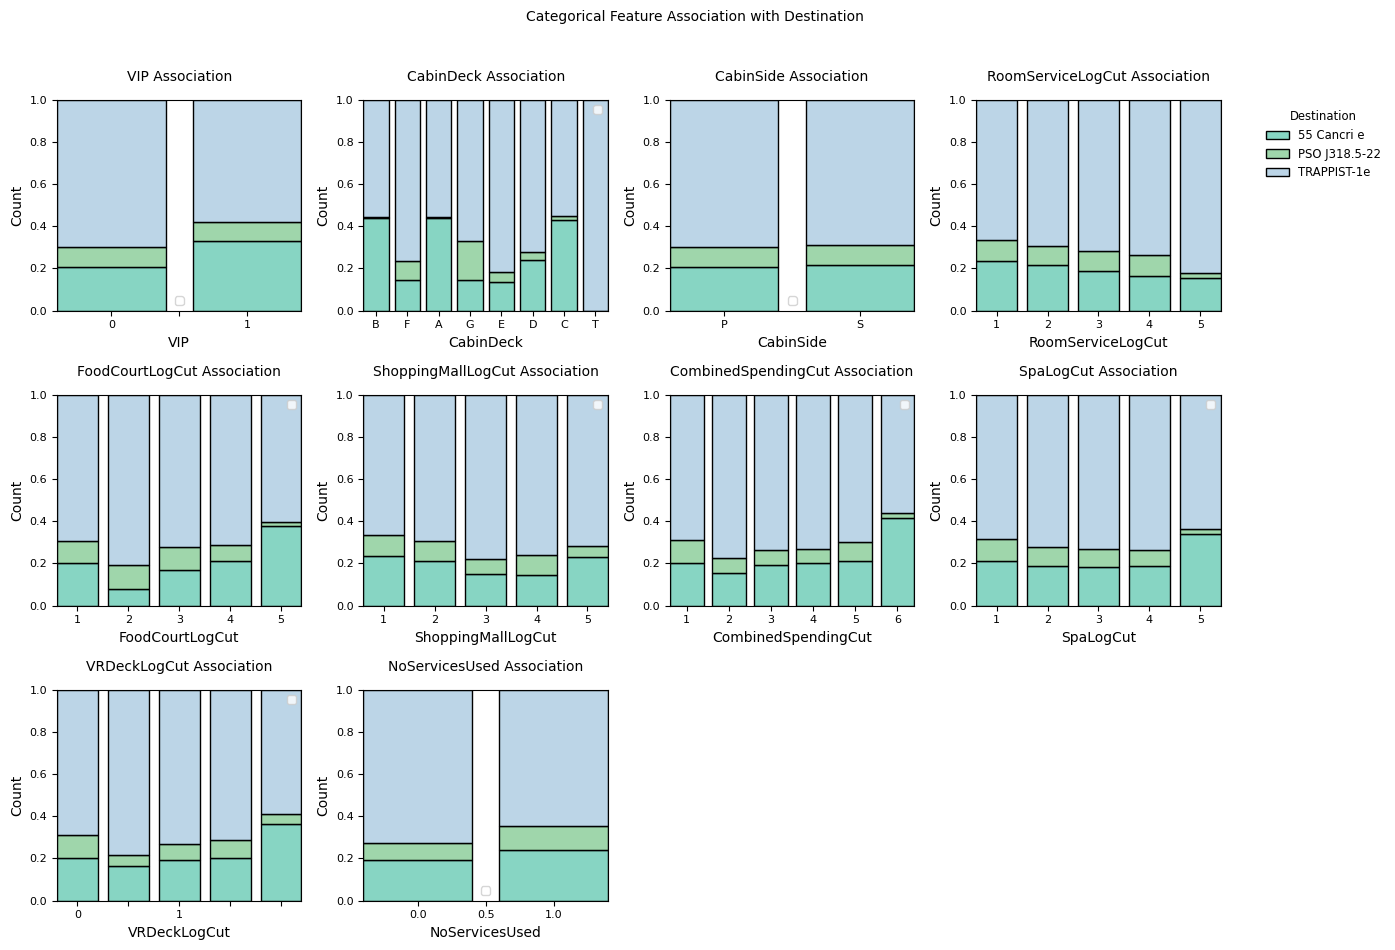

In [178]:
fig, axes = plt.subplots(3, 4, figsize=(14, 9))

axes = axes.ravel()

for col, ax in zip(destination_association_columns, axes):
    pl.plot_association_hist(x=col, data=train, hue="Destination", ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
            frameon=False, bbox_to_anchor=(1.7, 1),
            title='Destination', labels=['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'],
            title_fontsize='small', markerscale=2)

for ax in [axes[0], axes[8]]:
    ax.set_xticklabels(['', '0', '', '1'])

for axes in [axes[-1], axes[-2]]:
    fig.delaxes(axes)


plt.tight_layout()
plt.suptitle('Categorical Feature Association with Destination',
              size='medium', y=1.05);

*Comments:*

* `VIP` - VIP passengers are more likely to be travelling to 55 Cancri e and less likely to TRAPPIST-1e. No difference between groups in terms of PSO J318.5-22 as traveling destination.
* `CabinDeck` - most passengers from all decks are travelling to TRAPPIST-1e, although in some decks this proportion is higher.
* `CabinSide` - no association with destination.
* Binned `RoomService`/`FoodCourt`/`ShoppingMall`/`Spa`/`VRDeck` - there is some association, however, it does not help to impute the missing values in `Destination` column.

Results indicate that as the most passengers are headed towards TRAPPIST-1e, most frequent value imputation is the best choice for this column.

In [179]:
train['Destination'].isna().sum()

182

In [180]:
imp = SimpleImputer(strategy='most_frequent')

In [181]:
train['Destination'] = imputer.fit_transform(train[['Destination']])[:, 0]

In [182]:
train['Destination'].isna().sum()

0

---

#### <a id='toc1_6_2_8_'></a>[VIP Association with passengers parameters](#toc0_)

In [183]:
vip_association_columns = ['CabinDeck', 'CabinSide', 
                           'RoomServiceLogCut', 
                           'FoodCourtLogCut', 'ShoppingMallLogCut', 
                           'CombinedSpendingCut', 'SpaLogCut', 
                           'VRDeckLogCut', 'NoServicesUsed']

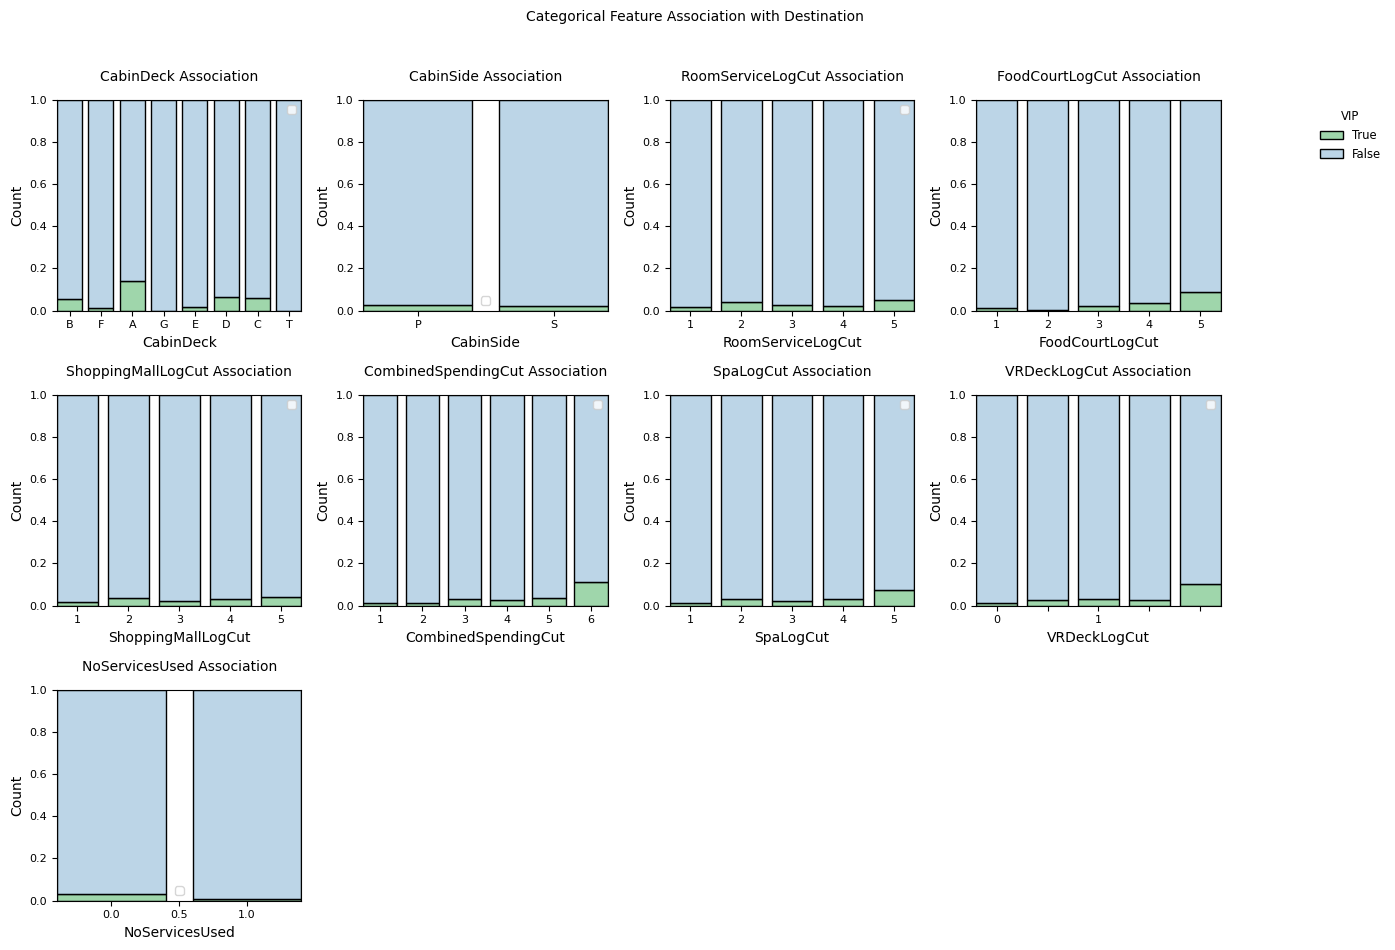

In [186]:
fig, axes = plt.subplots(3, 4, figsize=(14, 9))

axes = axes.ravel()

for col, ax in zip(vip_association_columns, axes):
    pl.plot_association_hist(x=col, data=train, hue="VIP", ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
            frameon=False, bbox_to_anchor=(1.7, 1),
            title='VIP', labels=['True', 'False'],
            title_fontsize='small', markerscale=2)

for ax in [axes[7]]:
    ax.set_xticklabels(['', '0', '', '1'])

for axes in [axes[-1], axes[-2], axes[-3]]:
    fig.delaxes(axes)

plt.tight_layout()
plt.suptitle('Categorical Feature Association with Destination',
              size='medium', y=1.05);

*Comment:*
* Most of the passengers are non-VIP passengers. 
* No significant associations can be observed from the data between categorical passenger features and VIP.

To impute missing VIP values, all missing values will be changed with the most frequent value - non-VIP passenger.

In [187]:
train.VIP.isna().sum()

203

In [188]:
imp = SimpleImputer(strategy='most_frequent')
train['VIP'] = imp.fit_transform(train[['VIP']])[:, 0]

In [189]:
train.VIP.isna().sum()

0

---

#### <a id='toc1_6_2_9_'></a>[RoomService association with passenger features](#toc0_)

In [194]:
room_service_associations_cols = ['HomePlanet', 'CryoSleep', 'Destination', 
                                  'VIP', 'CabinDeck', 'CabinSide', 
                                  'FoodCourtLogCut', 'ShoppingMallLogCut', 
                                  'SpaLogCut', 'VRDeckLogCut', 
                                  'CombinedSpendingCut', 'NoServicesUsed']

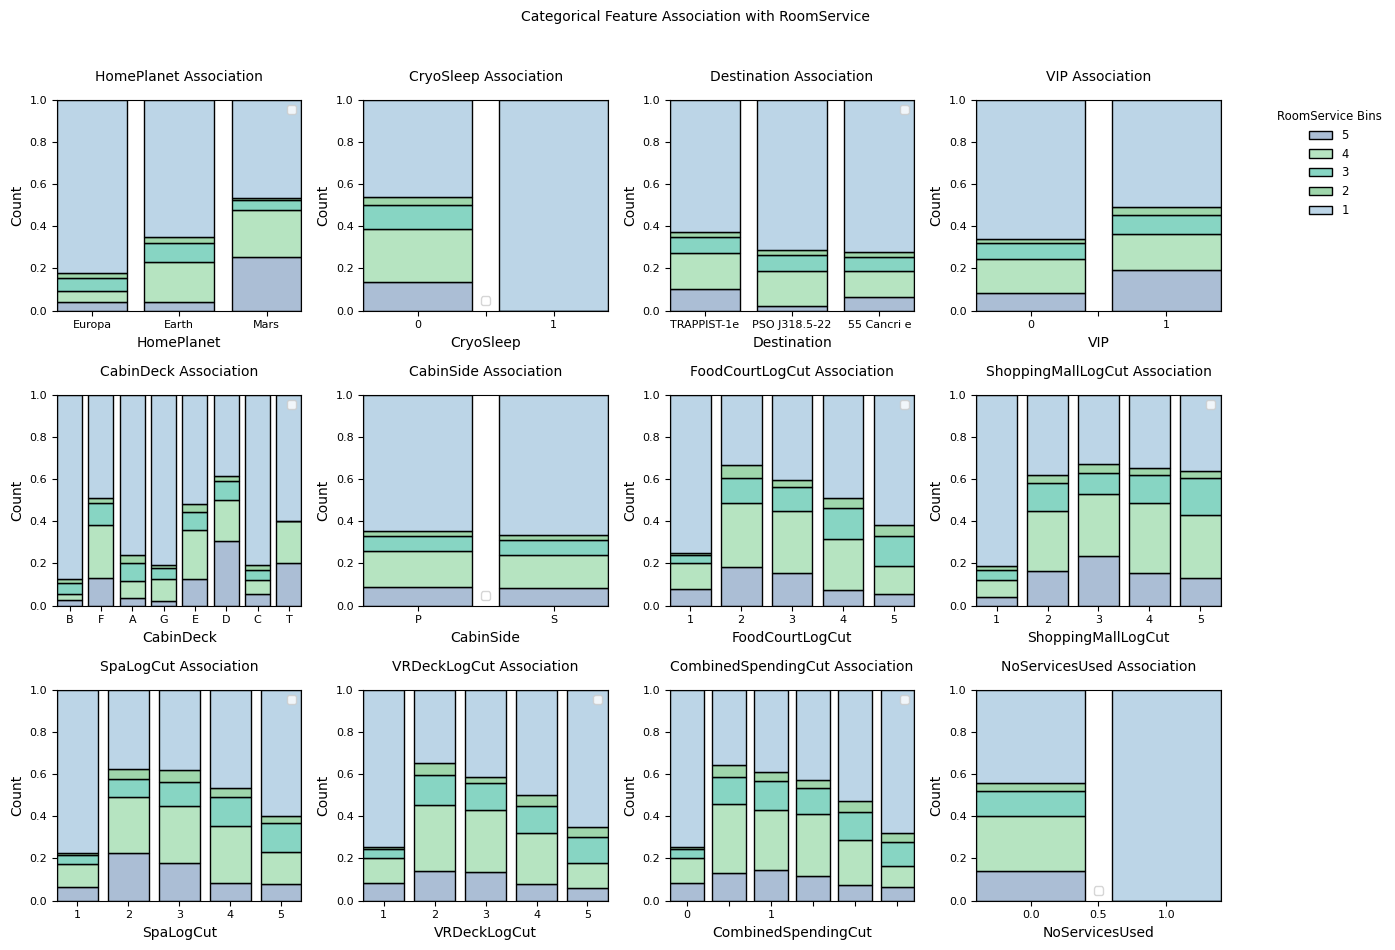

In [195]:
fig, axes = plt.subplots(3, 4, figsize=(14, 9))

axes = axes.ravel()

for col, ax in zip(room_service_associations_cols, axes):
    pl.plot_association_hist(x=col, data=train, hue="RoomServiceLogCut", ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[3].legend(loc='upper right', fontsize='small', 
            frameon=False, bbox_to_anchor=(1.7, 1),
            title='RoomService Bins', labels=[5, 4, 3, 2, 1],
            title_fontsize='small', markerscale=2)

for ax in [axes[1], axes[3], axes[10]]:
    ax.set_xticklabels(['',  '0', '', '1'])

plt.tight_layout()
plt.suptitle('Categorical Feature Association with RoomService',
              size='medium', y=1.05);

*Comments:*
* `HomePlanet` - most passengers from Europa don't use services and must be spending less on average than passsengers from other planets.
* `CryoSleep` - passengers in `CryoSleep` don't use `RoomServices`.
* `FoodCourt`/`ShoppingMall`/`Spa`/`VRDeck` - these features show association with `RoomService` spendings. However, they will not be used to impute missing values as the relationship is too complicated.

In [200]:
selected_cols = ['Age', 'CabinNum', 'PassengerGroup', 'PassengersPerGroup']

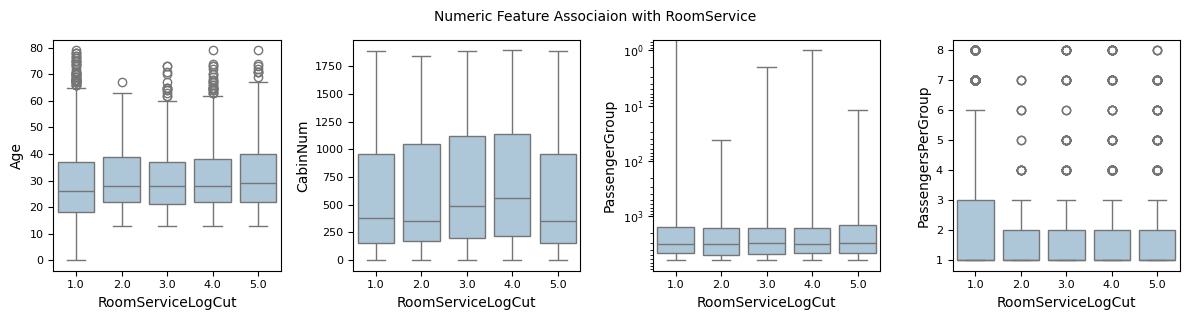

In [202]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.ravel()

for col, ax in zip(selected_cols, axes):
    sns.boxplot(train, x='RoomServiceLogCut', y=col, ax=ax)

axes[2].set_yscale('log')
plt.tight_layout()
plt.suptitle('Numeric Feature Associaion with RoomService', 
             size='medium', y=1.05);

*Comments:*
* RoomService shows some association with Age - passengers that spend more are usually older. To be able to impute amount spent on RoomService, let's bin the Age into smaller groups and see how Age is associated with RoomService and HomePlanet.

In [203]:
transformer = transformers.ColumnBinner(['Age'], bins=5, apply_log=False)
train = transformer.fit_transform(train)

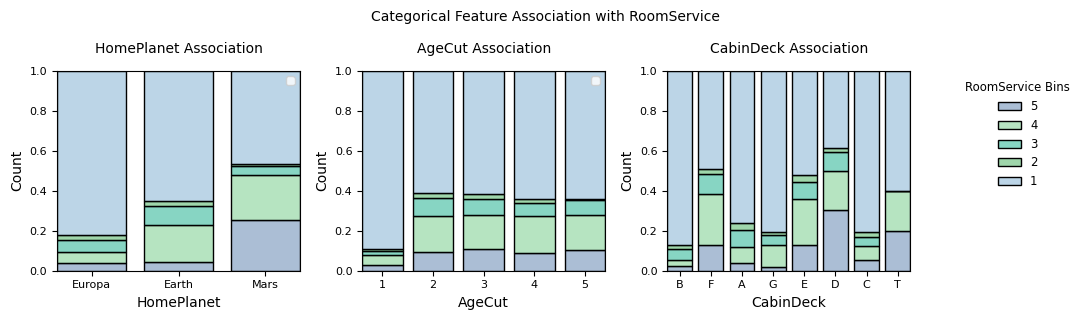

In [204]:
selected_cols = ['HomePlanet', 'AgeCut', 'CabinDeck']

fig, axes = plt.subplots(1, 3, figsize=(11, 3))

axes = axes.ravel()

for col, ax in zip(selected_cols, axes):
    pl.plot_association_hist(x=col, data=train, hue="RoomServiceLogCut", ax=ax,
                             title=f'{col} Association')
    ax.legend('')

axes[2].legend(loc='upper right', fontsize='small', 
            frameon=False, bbox_to_anchor=(1.7, 1),
            title='RoomService Bins', labels=[5, 4, 3, 2, 1],
            title_fontsize='small', markerscale=2)


plt.tight_layout()
plt.suptitle('Categorical Feature Association with RoomService',
              size='medium', y=1.05);

In [205]:
# Groupings by HomePlanet, Age, CabinDeck to impute RoomService by median and mean
train.groupby(['HomePlanet', 'AgeCut', 'CabinDeck'])['RoomService'].agg(['median', 'mean']).unstack().fillna(0)

median                                                 mean  \
CabinDeck              A    B    C       D      E     F    G    T           A   
HomePlanet AgeCut                                                               
Earth      1.0       0.0  0.0  0.0     0.0    0.0   0.0  0.0  0.0    0.000000   
           2.0       0.0  0.0  0.0     0.0    1.0   3.0  0.0  0.0    0.000000   
           3.0       0.0  0.0  0.0     0.0    2.0  10.0  0.0  0.0    0.000000   
           4.0       0.0  0.0  0.0     0.0    1.5   3.0  0.0  0.0    0.000000   
           5.0       0.0  0.0  0.0     0.0    0.0  17.5  0.0  0.0    0.000000   
Europa     1.0       0.0  0.0  0.0     0.0    0.0   0.0  0.0  0.0    1.411765   
           2.0       0.0  0.0  0.0     0.0    0.0   0.0  0.0  0.0  136.728395   
           3.0       0.0  0.0  0.0     0.0    0.0   0.0  0.0  0.0  179.632479   
           4.0       0.0  0.0  0.0     0.0    0.0   0.0  0.0  0.0   45.702703   
           5.0      19.0  0.0  0.0     0.0    0.0   0.0  0.0  0.0   50.200000   
Mars       1.0       0.0  0.0  0.0  1043.0    0.0   0.0  0.0  0.0    0.000000   
           2.0       0.0  0.0  0.0   803.0   71.0   3.0  0.0  0.0    0.000000   
           3.0       0.0  0.0  0.0   627.0   52.0  28.0  0.0  0.0    0.000000   
           4.0       0.0  0.0  0.0   938.0   39.0  51.0  0.0  0.0    0.000000   
           5.0       0.0  0.0  0.0   799.0  469.0   0.0  0.0  0.0    0.000000   

                                                                     \
CabinDeck                   B           C            D            E   
HomePlanet AgeCut                                                     
Earth      1.0       0.000000    0.000000     0.000000   120.743590   
           2.0       0.000000    0.000000     0.000000   197.763948   
           3.0       0.000000    0.000000     0.000000   235.326316   
           4.0       0.000000    0.000000     0.000000   189.555556   
           5.0       0.000000    0.000000     0.000000     0.000000   
Europa     1.0       0.000000   32.756757     4.714286     0.000000   
           2.0      80.188060  201.476510   124.243590    75.109091   
           3.0     119.888136  187.042403   293.053333   250.571429   
           4.0     113.596330  202.573913     6.538462     3.466667   
           5.0     313.833333   32.437500     0.000000   559.800000   
Mars       1.0       0.000000    0.000000  1717.083333  1038.900000   
           2.0       0.000000    0.000000  1044.083969   492.554404   
           3.0       0.000000    0.000000   956.133333   491.223529   
           4.0       0.000000    0.000000  1060.787879   338.300000   
           5.0       0.000000    0.000000  1309.142857  1014.000000   

                                                  
CabinDeck                   F           G      T  
HomePlanet AgeCut                                 
Earth      1.0     194.798165   10.993084    0.0  
           2.0     214.367026   90.722747    0.0  
           3.0     276.456338  110.308977    0.0  
           4.0     210.197080  104.296703    0.0  
           5.0     104.100000  158.029412    0.0  
Europa     1.0       0.000000    0.000000    0.0  
           2.0       0.000000    0.000000    0.0  
           3.0       0.000000    0.000000  427.2  
           4.0       0.000000    0.000000    0.0  
           5.0       0.000000    0.000000    0.0  
Mars       1.0      95.882051    0.000000    0.0  
           2.0     502.165680    0.000000    0.0  
           3.0     541.553797    0.000000    0.0  
           4.0     439.242105    0.000000    0.0  
           5.0     344.526316    0.000000    0.0

*Comments:*
* Age, HomePlanet and CabinDeck show associations with RoomService. To impute missing values, it is common to use the median method for numeric values. However, as showed in the tables above, if median method is used, most of the imputed missing values will be zero, as passengers most commonly did not spend anything on RoomService. Because of this, I will used the mean method for value imputation.

In [206]:
train['RoomService'].isna().sum()

181

In [207]:
# impute CryoSleepers to spenging of 0
imp = transformers.ColumnImputer(['CryoSleep', 'HomePlanet', 'AgeCut', 'CabinDeck'], 'RoomService', strategy='mean')

In [208]:
train = imp.fit_transform(train)

In [209]:
train['RoomService'].isna().sum()

0

---

#### <a id='toc1_6_2_10_'></a>[FoodCourt, ShoppingMall, Spa, VRDeck imputation](#toc0_)

RoomService has showed association with Age, HomePlanet, CabinDeck and CryoSleep. To see if these same parameters could be used for imputation of FoodCourt, ShoppingMall, Spa and VRDeck, Pairwise analysis will be applied

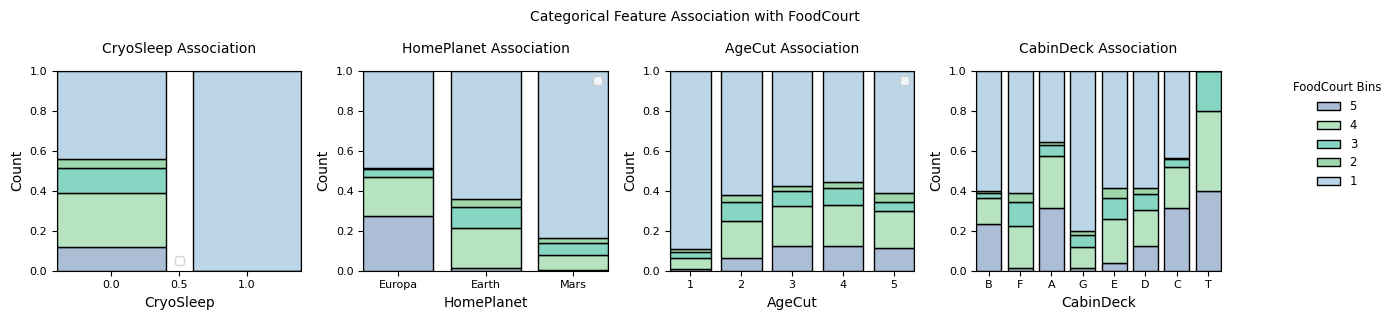

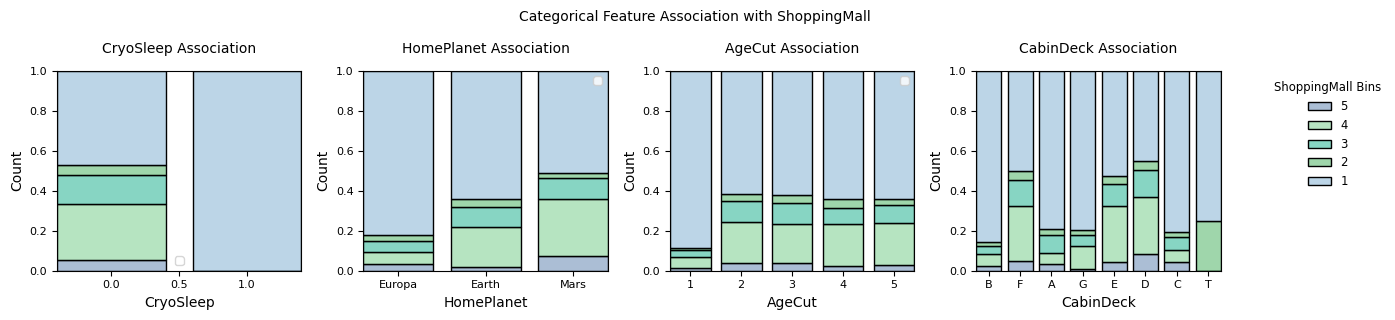

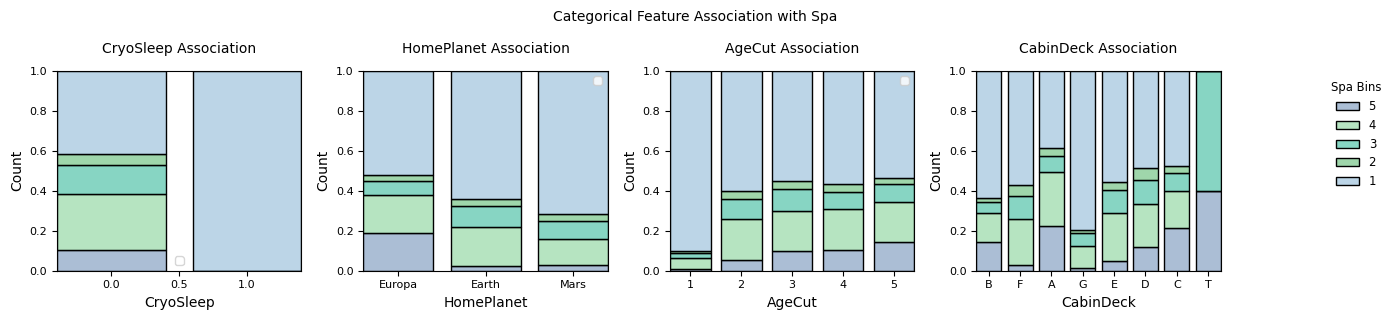

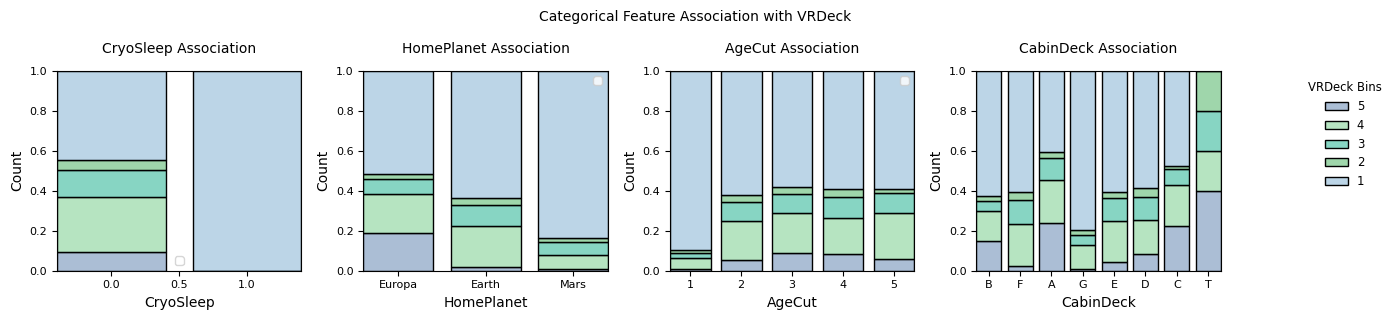

In [210]:
selected_cols = ['CryoSleep', 'HomePlanet', 'AgeCut', 'CabinDeck']
service_cols = ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for service in service_cols:
    fig, axes = plt.subplots(1, 4, figsize=(14, 3))

    axes = axes.ravel()

    for col, ax in zip(selected_cols, axes):
        pl.plot_association_hist(x=col, data=train, hue=f"{service}LogCut", ax=ax,
                                title=f'{col} Association')
        ax.legend('')

    axes[3].legend(loc='upper right', fontsize='small', 
                frameon=False, bbox_to_anchor=(1.7, 1),
                title=f'{service} Bins', labels=[5, 4, 3, 2, 1],
                title_fontsize='small', markerscale=2)


    plt.tight_layout()
    plt.suptitle(f'Categorical Feature Association with {service}',
                size='medium', y=1.05);

*Comments:

* `CryoSleep`, `HomePlanet`, `Age`, `CabinDeck` show simmilar associations with other services similarly to `RoomService`. Imputation on service columns will be applied using the same procedure as with RoomService - groupping by `CryoSleep`, `HomePlanet`, `Age` bin `CabinDeck` and calculating mean values in each of these subgroups.

In [211]:
for service in service_cols:
    print(f'{service} is missing {train[service].isna().sum()} values')
    imp = transformers.ColumnImputer(['CryoSleep', 'HomePlanet', 
                                          'AgeCut', 'CabinDeck'], 
                                          service, strategy='mean')
    train = imp.fit_transform(train)
    print(f'{service} is missing {train[service].isna().sum()} values')

FoodCourt is missing 183 values
FoodCourt is missing 0 values
ShoppingMall is missing 208 values
ShoppingMall is missing 0 values
Spa is missing 183 values
Spa is missing 0 values
VRDeck is missing 188 values
VRDeck is missing 0 values


---

### <a id='toc1_6_3_'></a>[Analyse, how different passenger parameters are correlated.](#toc0_)

#### <a id='toc1_6_3_1_'></a>[Numeric feature correlations](#toc0_)

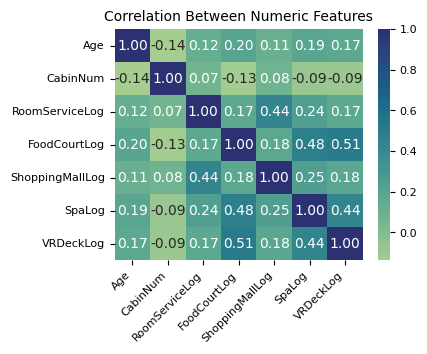

In [212]:
num_cols = ['Age', 'CabinNum', 'RoomServiceLog', 'FoodCourtLog', 
            'ShoppingMallLog', 'SpaLog', 'VRDeckLog']

corr_mtrx = train[num_cols].corr()

fig, axes = plt.subplots(1, 1, figsize=(4, 3))
sns.heatmap(corr_mtrx,
            cmap='crest', 
            annot=True, 
            fmt='.2f');

axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
axes.set_title('Correlation Between Numeric Features', size='medium');

*Comments:*

* Moderate correlation are observed between: 
    1) `shopping mall` and `room service`, reaching 0.44 coefficient. 
    2) `spa` and `food court`. Coefficient reaches 0.47. 
    3) `spa` and `VRDeck`. Coefficient reaches 0.43. 
* High correlation is observed between amounts spent in `food court` and `VRdeck`, reaching 0.51.

#### <a id='toc1_6_3_2_'></a>[Categorical feature associations](#toc0_)

To evaluate associations between categorical features, first all categorical features will be encoded and then Cramers V method will be applied. This is a method to analyse correlation between categorical variables and shows the strength of association between variables.

In [220]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'CabinDeck', 'CabinNum', 'CabinSide',
       'PassengerGroup', 'PassengerNumber', 'PassengersPerGroup', 'Surname',
       'FamilyMembers', 'NoServicesUsed', 'RoomServiceLog', 'FoodCourtLog',
       'ShoppingMallLog', 'SpaLog', 'VRDeckLog', 'CombinedSpending',
       'CombinedSpendingLog', 'RoomServiceLogCut', 'FoodCourtLogCut',
       'ShoppingMallLogCut', 'SpaLogCut', 'VRDeckLogCut',
       'CombinedSpendingCut', 'AgeCut'],
      dtype='object')

In [221]:
# replace categorical group names to numericals
binary_cols = ['CryoSleep', 'VIP', 'CabinSide']
non_binary_cols = ['HomePlanet', 'Destination', 'CabinDeck', 
                   'RoomServiceLogCut', 'FoodCourtLogCut', 
                   'ShoppingMallLogCut', 'SpaLogCut',
                   'VRDeckLogCut', 'CombinedSpendingCut'] 

all_cols = binary_cols + non_binary_cols
sub_train = train[all_cols]

In [222]:
encoder = OneHotEncoder(drop='if_binary')

transformed_data = encoder.fit_transform(sub_train)
transformed_data = transformed_data.toarray()

encoded_feature_names = encoder.get_feature_names_out()
sub_train_encoded = pd.DataFrame(transformed_data, 
                                 columns=encoded_feature_names)

In [223]:
rows = []

for var1 in sub_train_encoded:
    col = []
    for var2 in sub_train_encoded:
        cramers = fu.cramers_V(sub_train_encoded[var1], sub_train_encoded[var2])
        col.append(round(cramers, 2))
    rows.append(col)
    
cramers_results = np.array(rows)
cramer_matrix = pd.DataFrame(cramers_results, columns=sub_train_encoded.columns, 
                             index=sub_train_encoded.columns)

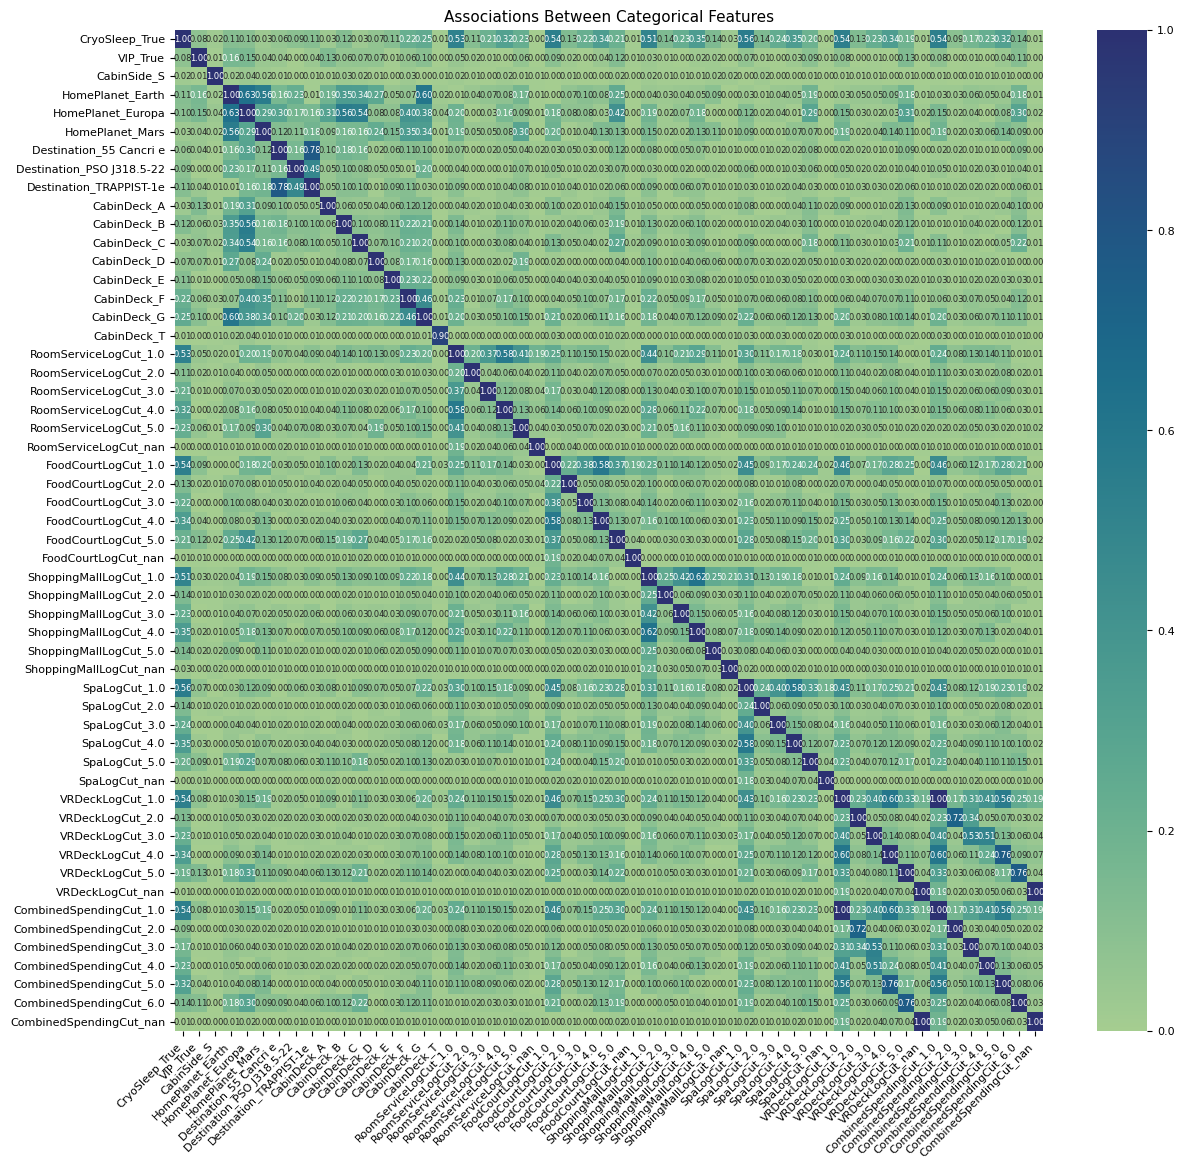

In [224]:
fig, axes = plt.subplots(1, 1, figsize=(14, 13))

sns.heatmap(cramer_matrix, 
            cmap='crest', 
            annot=True, 
            fmt='.2f',
            annot_kws={'size': 6})

axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
axes.set_title('Associations Between Categorical Features');

*Comments:*

* There are some highly associated patterns between categorical features:
    1) `Cryo sleepers` and `Room service`/`Food court`/`Shopping mall`/`Spa`/`VRDeck` bin 1 indicating low spenders
    2) `Home planet Earth` and `CabinDeck G`/`Home planet Mars`/`Home planet Europa`. Maybe Passengers from Earth are more located on G Deck.
    3) `Home planet Europa` and `CabinDeck C`/`CabinDeck B`. Maybe passengers from Europa are more located on C/B decks.
    4) `Destination 55 Cancri` e and `Destination TRAPPIST-1e`. 
    5) `Food court bin 1` and `Food court bin 4`. There might be similarities between these groups of passengers.

---

### <a id='toc1_6_4_'></a>[Identify groups of similar passengers.](#toc0_)

Previous results suggest that there might be a few passenger groups that have similar features. To find these passenger groups, clustering will be applied. Before clustering, dataset that has been processed in the EDA part will be preprocessed from the start using `data_preprocessing.py` pipeline


#### <a id='toc1_6_4_1_'></a>[DBSCAN Clustering](#toc0_)

In [230]:
processed = pd.read_csv('../data/processed_x_train_data.csv')

In [231]:
clusterer = transformers.DBSCANTransformer(eps=1, min_samples=20)

In [232]:
clustered_data = clusterer.fit_transform(processed)

In [233]:
clustered_data.loc[clustered_data['cluster'] !=-1]['cluster'].unique()

array([ 0,  1,  2,  3, 25,  4,  5,  6, 23,  7,  8,  9, 10, 11, 12, 13, 18,
       14, 15, 16, 17, 19, 26, 20, 21, 24, 22], dtype=int64)

In [234]:
clustered_data.loc[clustered_data['cluster'] !=-1]['cluster'].shape

(1534,)

*Comments:*
* For DBSCAN clustering, eps value of 1 and min number of 22 samples have been applied to generate 22 different passenger cluster groups that overall describe 1534 passengers. Most of the passengers do not get into clusters. 

---
## <a id='toc1_7_'></a>[Summary](#toc0_)

**Analyse, how different passenger parameters are associated with transportation to another dimension.**
* `HomePlanet` - passengers from Europa and Mars are more likely to be transported to another dimension compared to passengers from Earth.
* `CryoSleep` - passengers who were under cryo sleep were at least twice as likely to be transported to another dimension.
* `Destination` - passengers travelling to '55 Cancri e' were more likely to be transported to another dimension than passengers travelling to other destinations.
* `VIP` - VIP passengers were less likely to be transported to another dimension.
* `CabinDeck` - the most likely to be transported to another dimension were passengers from B and C decks. The least likely - from E deck.

* `CombinedSpendingCut` - the more passengers spend in total for services, the less likely they were to be transported to another dimension.
* `RoomService` - the more passengers spend on room services, the less likely they are to be transported to another dimension.
* `FoodCoutrt`/`ShoppingMall` - passengers spending the least and the most are more likely to be transported to another dimension.
* `Spa`/`VRDeck` - the more passengers spend on these services, the less likely they are to be transported to another dimension.
* `NoServicesUsed` -  passengers who did not use services, were more likely to be transported to another dimension.

* `Age` - passengers transported to another dimension are a little younger than those who were not transported. 
* `CabinNum` - passengers are more likely to be transported to another dimension, if their cabin number is lower. 

**Analyse, how different passenger parameters are associated with each other.**
* `Age` did not show significant association with other features, although there
were differences in spending for services in different age groups.

* `Cabin number` is lineary associated with passenger group. Most of the passengers 
travelling in the same group are located in the same `cabin number` and `deck` and all passengers 
from the same `group` are located in the same `cabin side`.

* Most of the passengers travelling to PSO J318.5-22 are from Earth. All passengers in decks
B, A, C and T are from Europe, and passengers in G deck are from Earth. Passengers in
other decks are from different `Home Planets`.

* Passengers who were in cryo sleep did not spend anything on services. 


**Analyse, how different passenger parameters are correlated.**

* Passengers spending more on `shopping` also spend more on `room service`. Passengers who 
spend more on `spa`, also spend more on `food court` and `VRDeck`.

**Identify groups of similar passengers.**
* Clustering identified 20 different passenger clusters that describe 2684 passengers.

---

## <a id='toc1_8_'></a>[Data Preprocessing Conclusions](#toc0_)

* Missing values were identified and imputed based on associations that were found between columns. Values that could not be imputed by associations, were imputed by 'most-frequent' or 'median'/'mean' methods. 

* Duplicated values were not found in the data.

* Service columns were binned into 5 bins with the first beeing passengers who did not spend anything. 

* PassengerId was split into PassengerGroup and PassengerId. New column PassengersPerGroup were added. 

* Cabin was split into CabinNum, CabinDeck and CabinSide

* Before applying clustering, numeric columns were scaled and outliers were removed. For categorical columns, OneHotEncoding applied.